# Dominance Plot: Left-Right

A while back I knocked together a process for generating charts to look at the breakdown of political valuespace (Economic Left-Right vs Social Liberal-Conservative) against any given variable (e.g. which way did people vote/want to vote? which politician do they like?).

I wrote a litte explainer for the concept [here](https://medium.com/@mariosrichards/political-patchwork-chart-1360289011a3?source=friends_link&sk=9ddbb607a04796a9411341363b48fb3a).

That process threw up (somewhat literally) a sticky rainbow of charts because in the process of building each final "dominance chart" I build individual charts (2D heatmap and 3D surface projection - wasn't sure which was better so made both for each) for each option in the variable you're breaking down (e.g. each political party if the variable is "who did you/would you vote for?").

On top of that, the British Election Study has run for 16 waves (2014-2019) so obviously the first thing you want to do is look at how the charts change over waves.

That ends up being *quite a lot of graphs* - even for a [*very* charty twitter account](https://twitter.com/MariosRichards/status/1197452192933916672).

Following initial suggestions, I turned them into [animated gifs](https://twitter.com/MariosRichards/status/1203699156595990529), but it's fiddly and just not as good as being able to explore the data yourself.

So, after much cursing, I've hammered together a workflow that lets me turn the Jupyter notebooks I work with python in into kinda-sorta blog posts with interactive figures.

The code is hidden (can be toggled to visibility, would not recommend it at the moment!) but if you scroll down you'll see the breakdown for the BES "leftRight" variable ("In politics people sometimes talk of left and right. Where would you place yourself on the following scale?": 0(Left) to 10(Right) )

There are three interactice charts
- the first is a 3D surface for each party in each wave (where they exist - no BXP before wave 16!)
- the second is a 2D heatmap for each party in each wave ("")
- the third is the "dominance plot" with all the parties combined in one plot (which is to say, most of the parties hidden under dominant parties) in each wave


In [2]:
# import warnings
# warnings.filterwarnings('ignore')

# from IPython.display import display
# from IPython.display import HTML
# import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# # This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# # This line will add a button to toggle visibility of code blocks, for use with the HTML export version
# di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [3]:
# dataset_name = "W16_comb"
# df_list = [
#            "BES_Panel",
# #            "BES_reduced_with_na",
# #            "BESnumeric"
# #            "BES_reduced",
# #            "BESnumeric"
#           ]

In [4]:
# %matplotlib inline
# # %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True}}
# # import matplotlib
# # matplotlib.use('svg')   # generate svg output by default
# # print(matplotlib.get_backend())

# import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# # print(matplotlib.get_backend())
# import pickle, os, gc, re
# # print(matplotlib.get_backend())

# sns.set();
# # sns.palplot(sns.color_palette("colorblind"));
# sns.set_palette("colorblind")
# # print(matplotlib.get_backend())

# from IPython.display import display, display_html, HTML
# plt.rcParams["axes.grid"] = False
# # print(matplotlib.get_backend())

# import Jupyter_module_loader
# from utility import *
# import gaussian_kde
# # print(matplotlib.get_backend())

# import warnings
# warnings.filterwarnings('ignore')
# # print(matplotlib.get_backend())



# # hv.extension.display_formats = ["svg"]
# encoding = "ISO-8859-1"
# # print(matplotlib.get_backend())

# # print(matplotlib.get_backend())

In [5]:

# hv.extension.display_formats

In [6]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (7911, 14)
Wall time: 37.7 s


In [7]:
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')
# matplotlib.use('svg')   # generate svg output by default

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [8]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()
pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index]

In [9]:
# # you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# # %matplotlib inline
# (BES_code_folder, BES_small_data_files, BES_data_folder,
#  BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()

# global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
# data_subfolder = BES_data_folder + dataset_name + os.sep

# (manifest, dataset_filename, dataset_description, dataset_citation,
#  dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

# for df in df_list:
#     if df=="BES_Panel":
#         globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
#     else:
#         globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
#         globals()[df].replace(-1,np.nan,inplace=True)
  
# # (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

# # get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")
# pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )

In [10]:
# helper functions
global best_weight_series
def weighted_mean(series):
    return (series*best_weight_series.loc[series.index]).sum()/(best_weight_series.loc[series.index]).sum()

from pandas._libs.lib import is_integer

def weighted_qcut(values, weights, q, **kwargs):
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
        
    if values.isnull().sum()>0:
        raise Exception("nans in values")
        
    if weights.isnull().sum()>0:
        raise Exception("nans in weights")
        
    order = weights.loc[weights.index[values.argsort()]].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index()

# CHEATY FIX FOR WEIGHTING SEABORN KDES BEFORE THEY FIX SEABORN TO PASS WEIGHTS

# so we take in a series of weights - either assumes/force it to be non-null floats [0-inf)
# flip coins for the fractional parts of the weights to round up/down proportionately
# then replicate rows on the basis of the resulting weights

def lazy_weighted_indices(weights):
    x = weights.apply(lambda x: np.floor(x) if (np.random.rand() > x%1) else np.ceil(x)).astype('int')
    return flatten( [[weights.index[ind]]*x.values[ind] for ind in range(weights.shape[0])] )

def weighted_value_counts(x, wts, *args, **kwargs):
    normalize = kwargs.get('normalize', False)
    perc = kwargs.get('perc', False)
    decimal_places = kwargs.get('decimal_places', 2)
    suppress_raw_samplesize = kwargs.get('suppress_raw_samplesize', False)
    
    ascending = kwargs.get('ascending', True)
    c0 = x.name 
    c1 = wts.name
    df = pd.concat([x,wts],axis=1)
    xtmp = df.groupby(c0).agg({c1:'sum'}).sort_values(c1,ascending=False)
    s = pd.Series(index=xtmp.index, data=xtmp[c1], name=c0)
    s.name = "weighted_sample_size"
    if normalize:
        s = s / df[c1].sum()
        s.name = "weighted_sample_fraction"
    if normalize and perc:
        s = s*100
        s.name = "weighted_sample_percentage"
    s = s.round(decimal_places)
    if decimal_places==0:
        s=s.astype('int')
        
    if not suppress_raw_samplesize:
        output = pd.DataFrame([s,x[wts.notnull()].value_counts()]).T
        output.columns = [s.name,"raw_sample_size"]
        output.index.name = x.name
        output.sort_values(by=s.name,inplace=True, ascending=ascending)
    else:
        output = s
    return output

import random
 
def distinct_colors(n):
  ret = []
  r = 128+int(random.random() * 128)
  g = 128+int(random.random() * 128)
  b = 128+int(random.random() * 128)
  step = 128 / n
  for i in range(n):
    r += step
    g += step
    b += step
    r = 128+ (int(r) % 128)
    g = 128+ (int(g) % 128)
    b = 128+ (int(b) % 128)
    ret.append((r/255,g/255,b/255)) 
  return ret

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def fix_BESW16_variable_order():
    leftRight_cats = ['Left', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Right',       "Don't know"]
    howToReduceDeficit_cats = ['Only by increasing taxes','Mainly by increasing taxes, but also by cutting spending','An equal balance of spending cuts and tax increases', 
                               'Mainly by cutting spending, but with some tax increases','Only by cutting spending',"Don't know"   ]
    cutsTooFarNational_cats = ['Not gone nearly far enough', 'Not gone far enough', 'About right', 'Gone too far','Gone much too far', "Don't know"]
    taxSpendSelf_cats = ['Government should cut taxes a lot and spend much less on health and social services','1', '2', '3', '4', '5', '6', '7', '8', '9',       
                         'Government should increase taxes a lot and spend much more on health and social services', "Don't know"]
    spend_cats = [ 'Spend much less','Spend less', 'Spend the same as now', 'Spend more','Spend much more',"Don't know"]
    ageGroup_cats = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']    
    
    BES_Panel[match(BES_Panel,"lr[^A0-9_]|leftRight").index] = \
        BES_Panel[match(BES_Panel,"lr[^A0-9_]|leftRight").index]\
            .apply(lambda x: x.cat.reorder_categories(leftRight_cats))    
    
    for like_var in BES_Panel.columns:
        if re.match("^ptv(?!expgrp)", like_var):
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Very unlikely','1', '2', '3', '4', '5', '6', '7', '8', '9',
                       'Very likely', "Don't know" ]))    
        elif re.match("like[A-Z]",like_var):
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Strongly dislike','1', '2', '3', '4', '5', '6', '7', '8', '9', "Don't know",
        'Strongly like']))                
        elif "immigEcon" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Bad for economy', '2', '3', '4', '5', '6', 'Good for economy',
       "Don't know"]))  
        elif "immigCultural" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Undermines cultural life', '2', '3', '4', '5', '6',
       'Enriches cultural life', "Don't know"]))     
        elif "immigrantsWelfareState" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Strongly disagree', 'Disagree', 'Neither agree nor disagree',
       'Agree','Strongly agree',  "Don't know"]))  
        elif "deficitReduce" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['It is completely necessary','It is important but not absolutely  necessary','It is not necessary but it would be desirable','It is completely unnecessary',"Don't know"]))  
        elif "howToReduceDeficit" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(howToReduceDeficit_cats))  

        elif "taxSpendSelf" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(taxSpendSelf_cats))
            


In [11]:
# Some convenience fixes to harmonise past vote columns

# Probably_didnt_vote_list = ["Don't know","No, did not vote","No, I did not vote"]
# Didnt_vote_not_sure =BES_Panel["profile_turnout_2015"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
# if "Did not vote" not in BES_Panel["profile_past_vote_2015"].cat.categories:
#     BES_Panel["profile_past_vote_2015"].cat.add_categories("Did not vote",inplace=True)
# BES_Panel["profile_past_vote_2015"][Didnt_vote_not_sure] = "Did not vote"
# Didnt_vote_not_sure =BES_Panel["profile_turnout_2017"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
# if "Did not vote" not in BES_Panel["profile_past_vote_2017"].cat.categories:
#     BES_Panel["profile_past_vote_2017"].cat.add_categories("Did not vote",inplace=True)
# BES_Panel["profile_past_vote_2017"][Didnt_vote_not_sure] = "Did not vote"
# Didnt_vote_not_sure =BES_Panel["euroTurnoutRetroW16"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
# if "Did not vote" not in BES_Panel["euroElectionVoteW16"].cat.categories:
#     BES_Panel["euroElectionVoteW16"].cat.add_categories("Did not vote",inplace=True)
# BES_Panel["euroElectionVoteW16"][Didnt_vote_not_sure] = "Did not vote"
# Didnt_vote_not_sure =BES_Panel["profile_eurefturnout"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
# if "Did not vote" not in BES_Panel["profile_eurefvote"].cat.categories:
#     BES_Panel["profile_eurefvote"].cat.add_categories("Did not vote",inplace=True)
# BES_Panel["profile_eurefvote"][Didnt_vote_not_sure] = "Did not vote"

# BES_Panel["housing"] = BES_Panel["housing"].replace(9999,"Don't know").cat.remove_unused_categories()

# cats = BES_Panel["profile_gross_household"].cat.categories
# BES_Panel["profile_gross_household"].cat.rename_categories( [x.replace("Â","") for x in cats],inplace=True)
# # party_colour_dict.update( {x:k for x,k in zip(cats,linear_colour_list[0:len(cats)+1]) if x != "Don't know"} )

In [12]:
# fix_BESW16_variable_order()

replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GRN",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 'No - none':"NON",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",}

party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LD":"orange",
                     "Grn":'green',"GRN":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","CUK":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "Remain":"yellow","REMAIN":'yellow',"Leave":"blue","LEAVE":'blue',
                     "Don't know":"grey","DK":'grey',"OTH":'lightslategrey',
                     "Won't vote":"black","DNV":'black',"NON":'black',
                     "Cameron":'navy',"May":'blue',
                     "Osborne":"darkblue","Davidson":"darkblue",
                     "Boris":'cyan',"Gove":"darkviolet","Rudd":'teal',"Mogg":"black" ,"Hunt":"grey" , "Javid":"dodgerblue", 
                     "Davis":"lightblue","Mogg":'lightblue',
                     "Salmond":'goldenrod',"Sturgeon":'yellow',
                     "Miliband":'red',"Corbyn":'red',"Blair":"indianred",
                     "AlanJohnson":'pink',"Watson":"chocolate","McDonnell":"darkred","Jarvis":'tomato',"Leonard":'pink',
                     "Wood":'olive',"Price":'olive',
                     "Umunna":"lightslategrey","Berger":'darkslategrey',"Soubry":'mediumspringgreen',"Allen":"darkslategrey",
                     "Clegg":'orange',"Farron":'orange',"Cable":'orange',"Rennie":'darkorange',
                     "Farage":'purple',"SEvans":"fuchsia","Nuttall":'indigo',"Batten":'indigo',
                     "Bennett":'green',"Lucas":'limegreen',"Harvie":"green","Berry":'darkgreen',"Bartley":'limegreen',
                     "Allow many fewer":"blue","Left":"blue",
                     "1":'cyan',"Bad for economy":'cyan',"Undermines cultural life":'cyan','Strongly disagree':'cyan','It is completely necessary':'cyan',
                     "2":'yellow','Disagree':'yellow','It is important but not absolutely  necessary':'yellow',
                     "3":'olive','Neither agree nor disagree':'olive','It is not necessary but it would be desirable':'olive',
                     "4":'green', 'Agree':'green','It is completely unnecessary':'green',
                     "5":"limegreen",'Strongly agree':'limegreen',
                     "6":"orange",
                     "7":'brown',"Good for economy":'brown',"Enriches cultural life":'brown',
                     "8":'pink',
                     "9":'purple',
                     "Allow many more":'red',"Right":'red',
#                      "The Sun": 'cyan',
#                      "The Guardian": 'green',
#                      "The Mirror / Daily Record":'red',
#                      "The Daily Mail / The Scottish Daily Mail":'blue',
#                      "The Times":'yellow',
                    }

big_set_of_colours = list(set(party_colour_dict.values()))
big_set_of_colours = [x for x in big_set_of_colours if x not in ['grey','lightslategrey','darkslategrey']]
big_set_of_colours = ['olive', 'purple', 'orange', 'red', 'cyan',
                      'limegreen', 'darkred', 'blue', 'chocolate',
                      'pink', 'darkgreen', 'yellow', 'darkorange','magenta', 'mediumspringgreen', 'tomato', 'teal',
                      'goldenrod',  'indianred']

In [13]:
# ordinal_variable


In [14]:
# df_temp[df_temp>=min_sample_size].dropna(how ='all').sum(axis=1)

In [15]:
# mask out fake BES respondents *and* respondents we have no value data for

mask = (~((pan_dataset_allr_values[pan_dataset_allr_values.columns[2:4]].isnull().any(axis=1))|(BES_Panel["wt_new_W19_result"].isnull() & BES_Panel["wave19"])))
BES_Panel = BES_Panel[mask]
pan_dataset_allr_values = pan_dataset_allr_values[mask]

In [16]:
mask = (~((pan_dataset_allr_values[pan_dataset_allr_values.columns[2:4]].isnull().any(axis=1))|(BES_Panel["wt_new_W19_result"].isnull() & BES_Panel["wave19"])))
BES_Panel["2019GE"] = pan_dataset_votes.loc[BES_Panel.index,"2019GEVote_simple"]
BES_Panel["2017GE"] = pan_dataset_votes.loc[BES_Panel.index,"2017GEVote_simple"]

In [17]:
from scipy import interpolate
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib import colors as mcolors
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

wave_descriptions = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"][["Wave No","Friendlier_Description"]].set_index("Wave No")

Processing wave:  


<IPython.core.display.Javascript object>


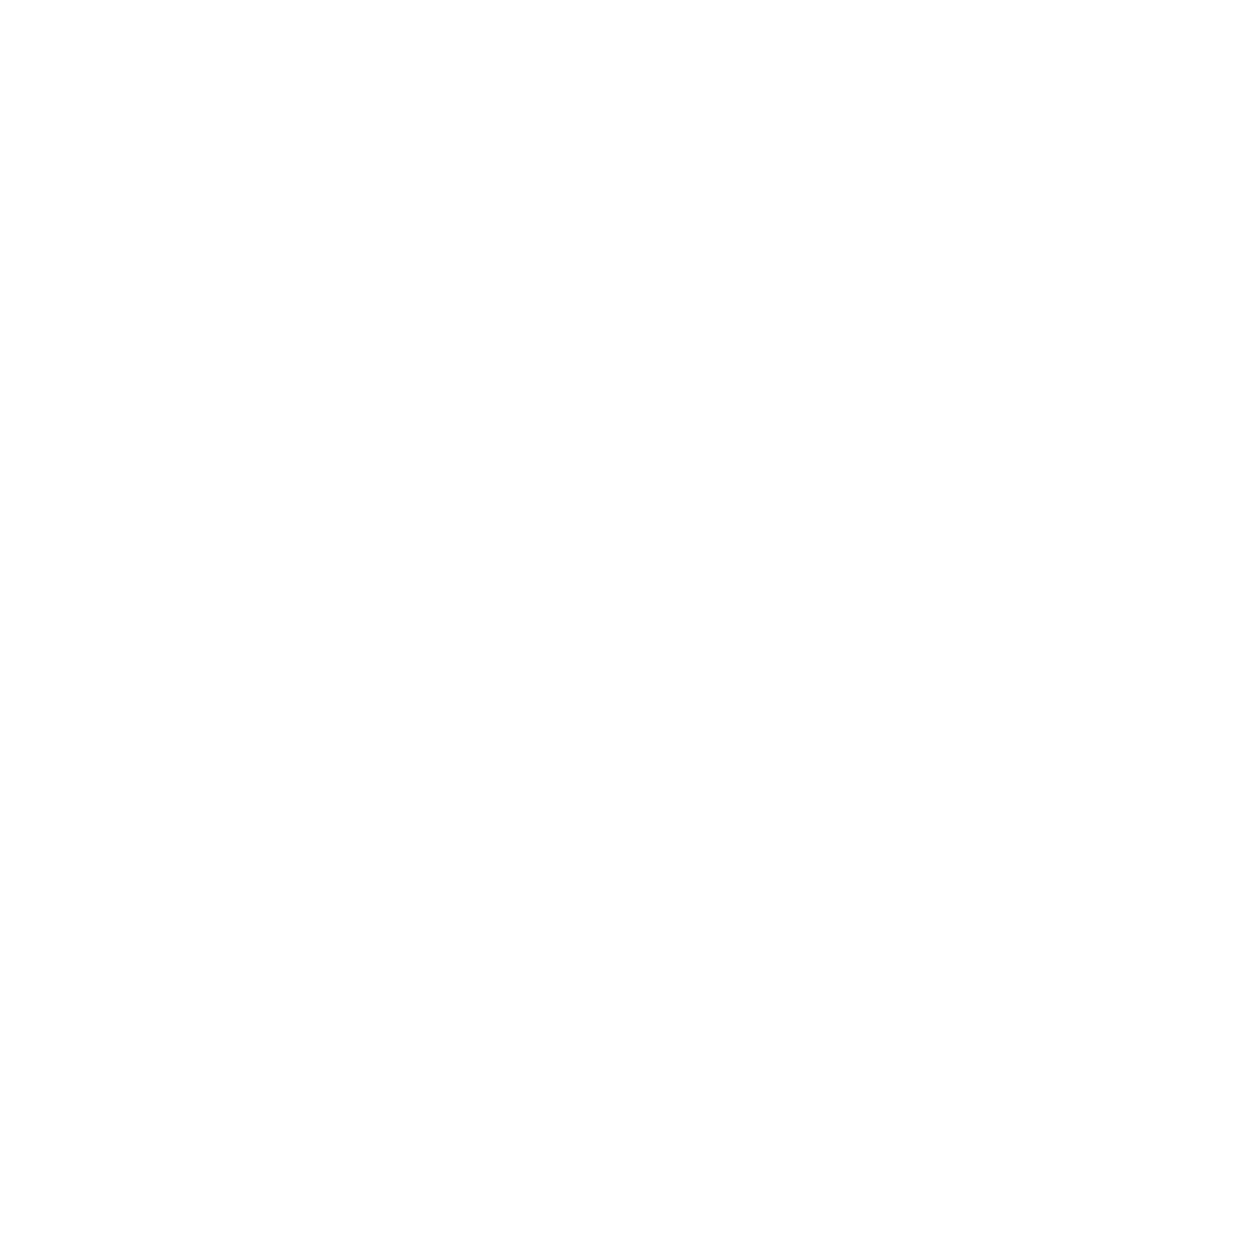

<IPython.core.display.Javascript object>


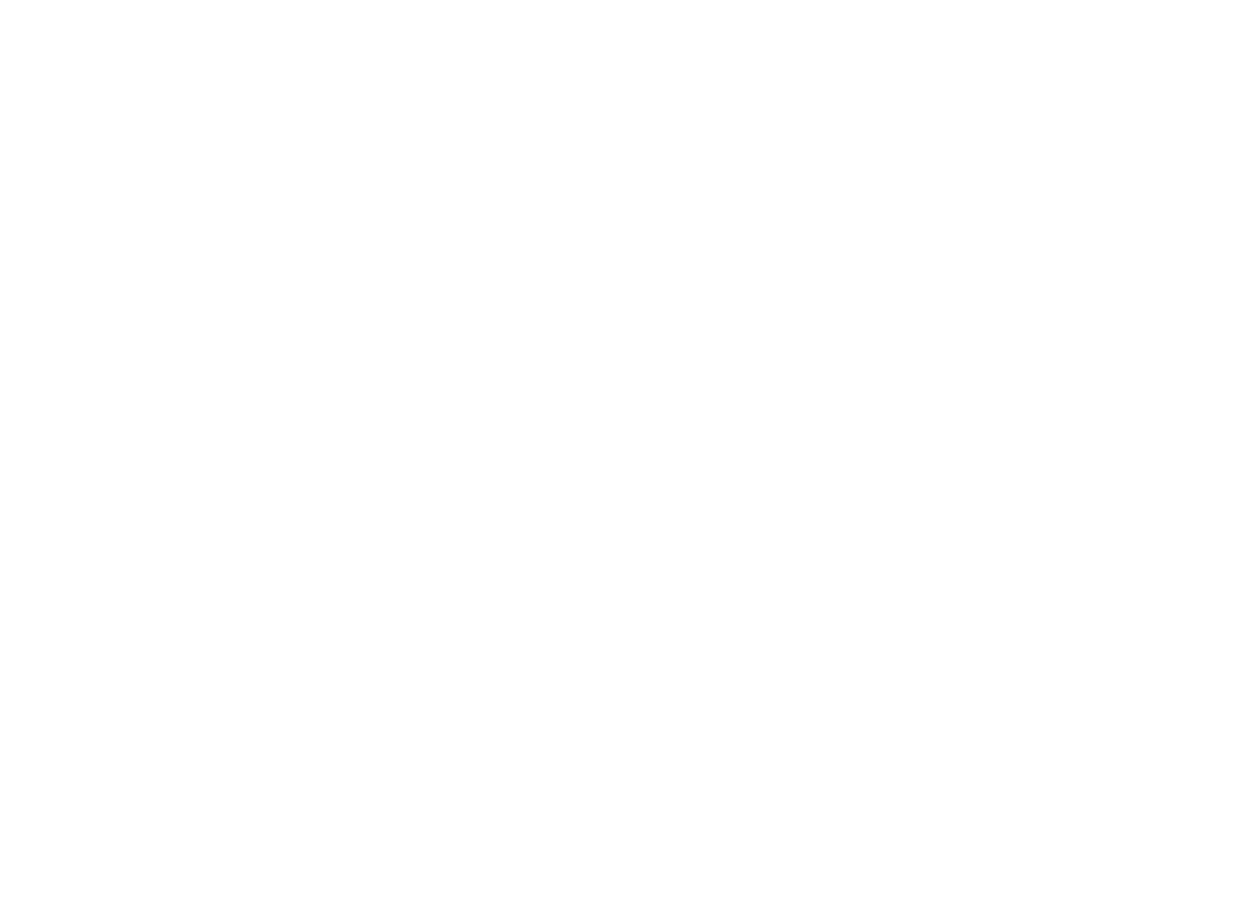

<IPython.core.display.Javascript object>


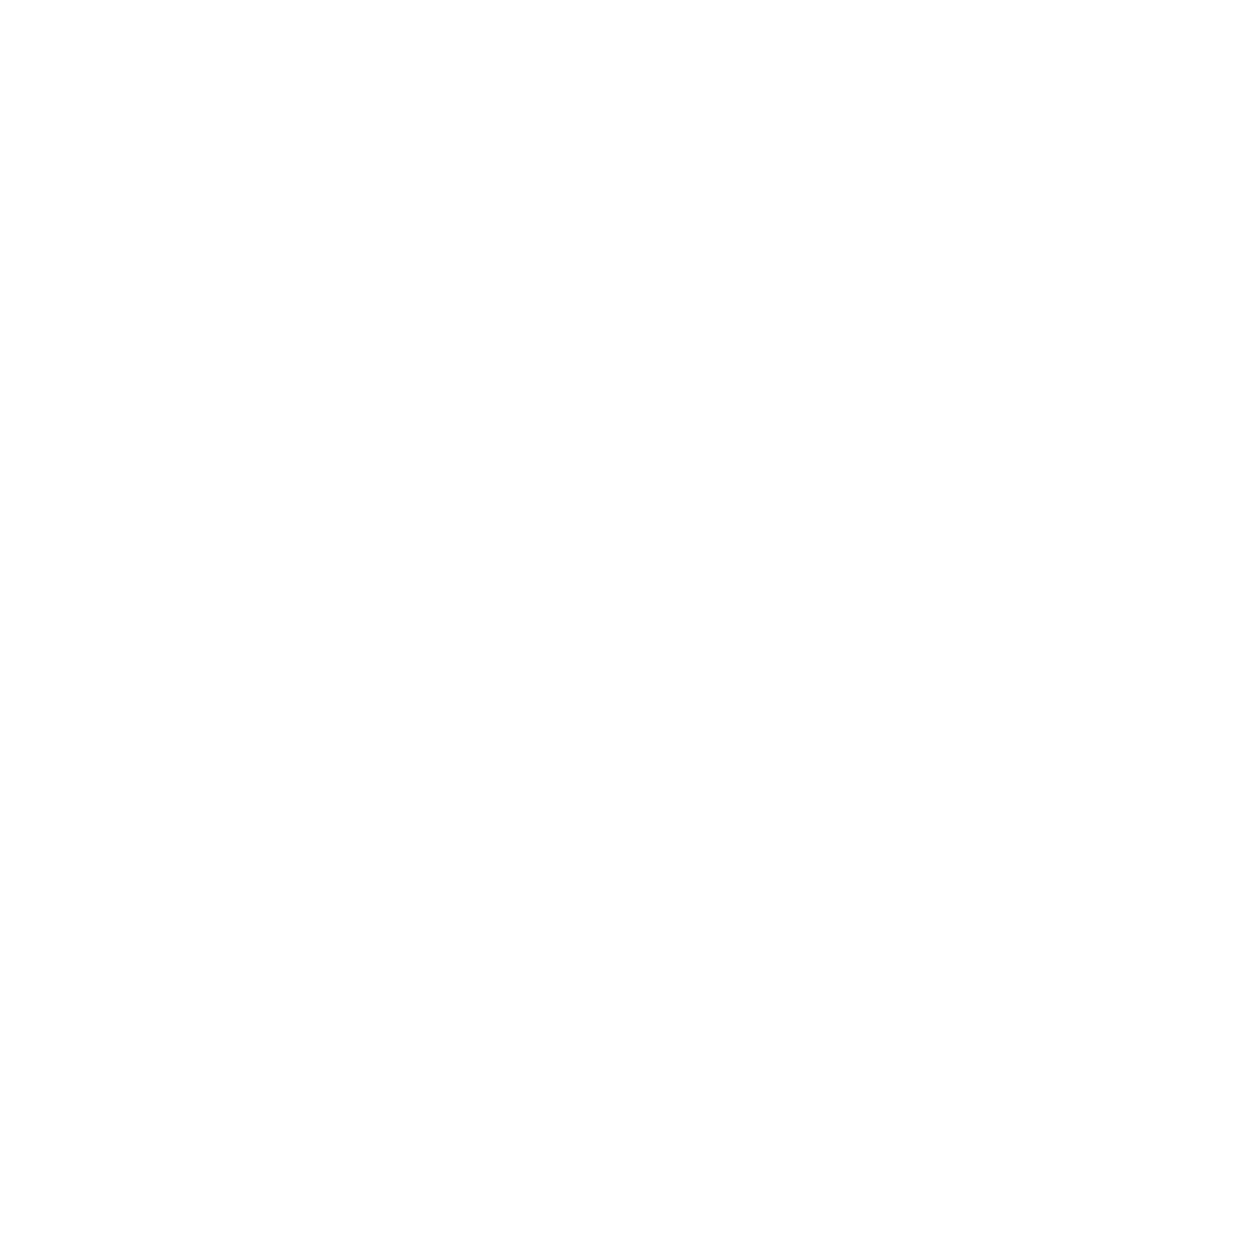

<IPython.core.display.Javascript object>


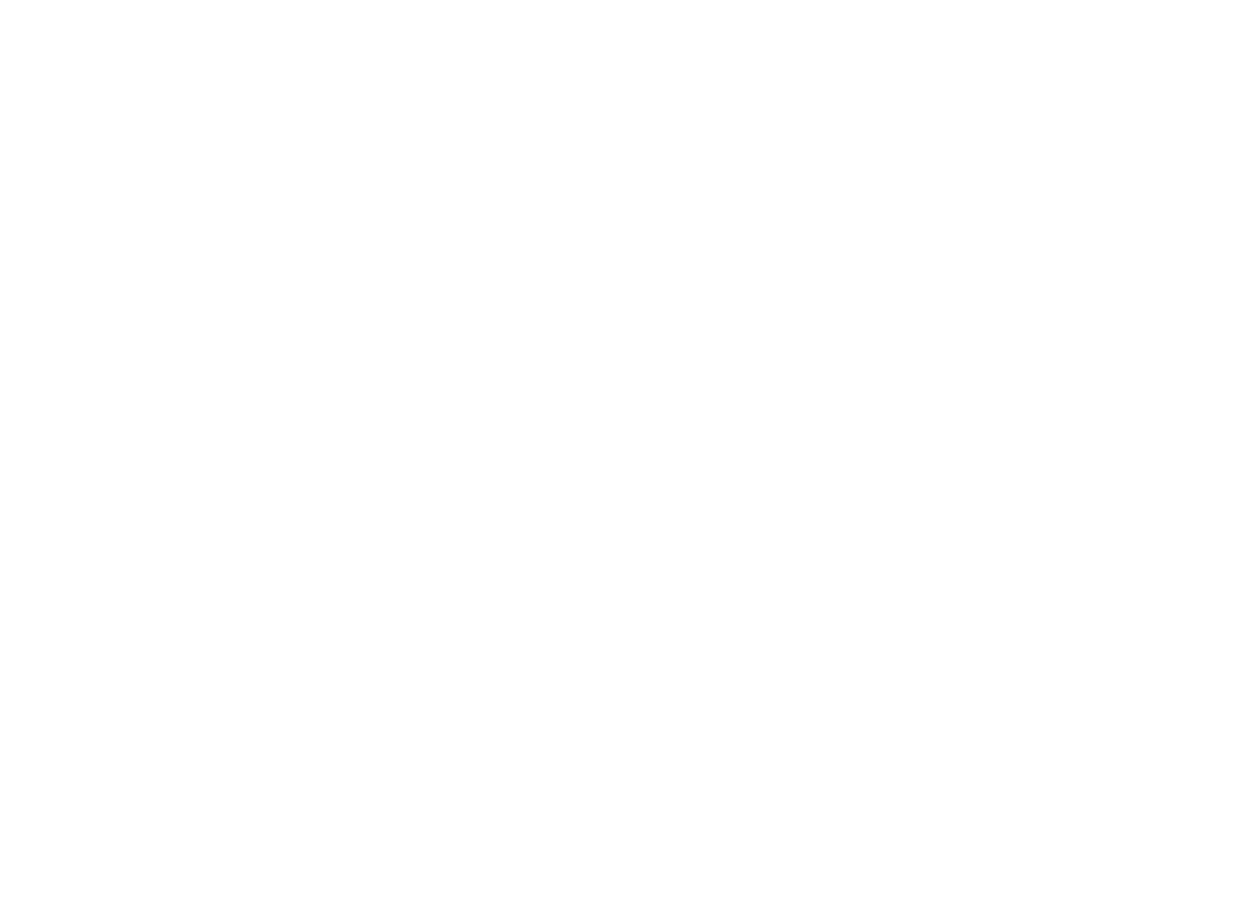

<IPython.core.display.Javascript object>


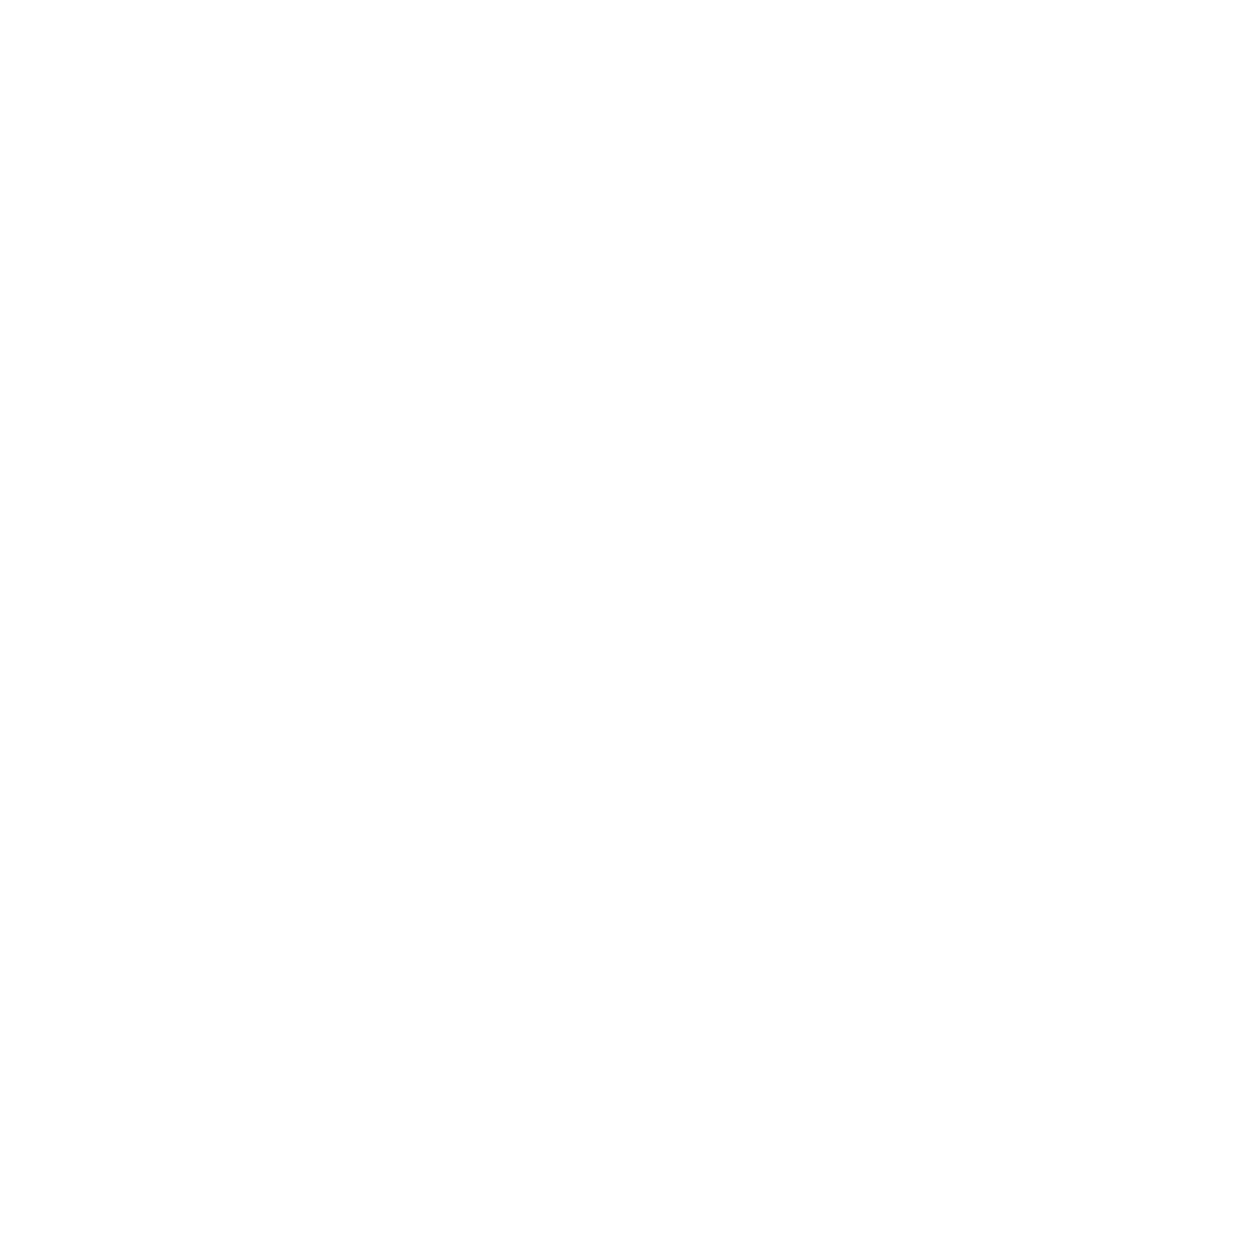

<IPython.core.display.Javascript object>


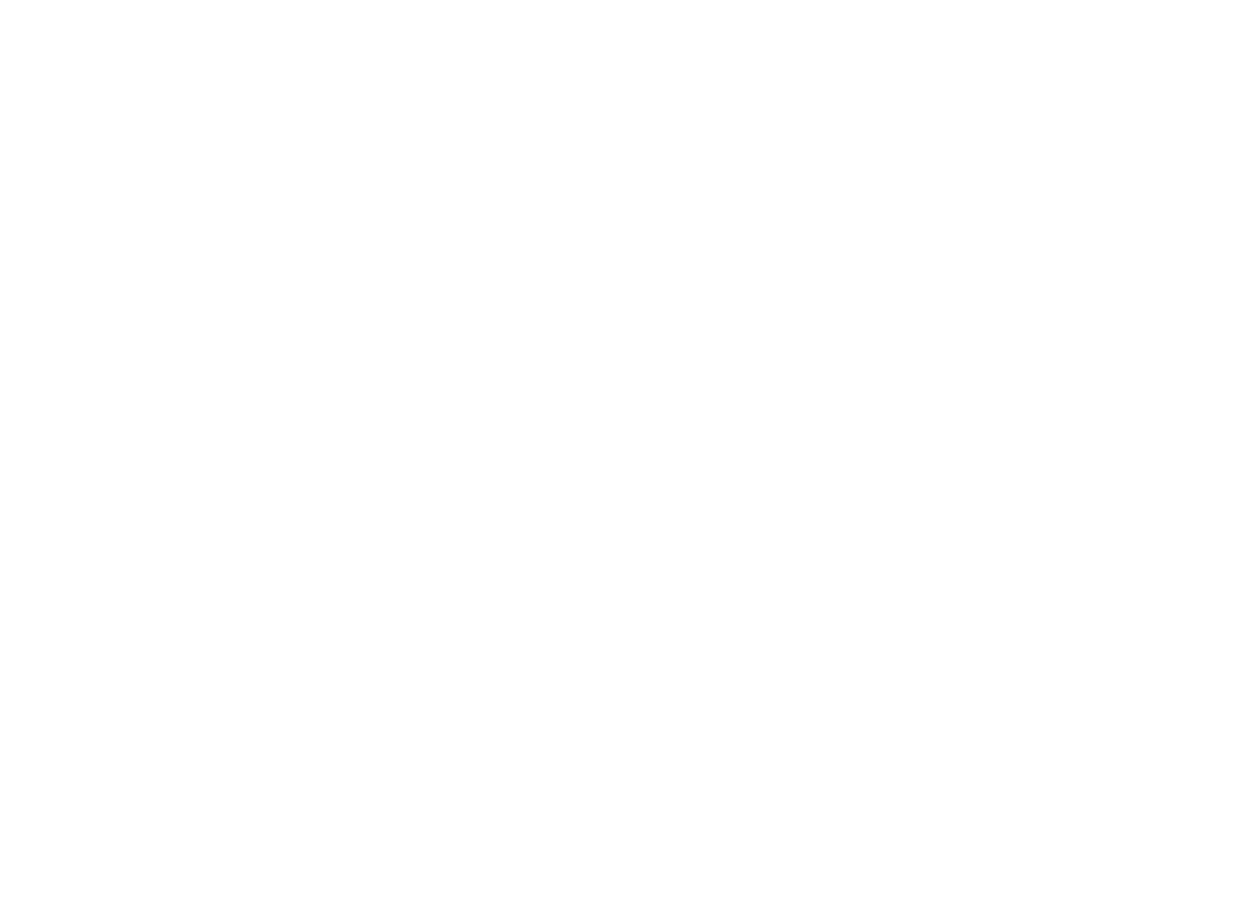

<IPython.core.display.Javascript object>


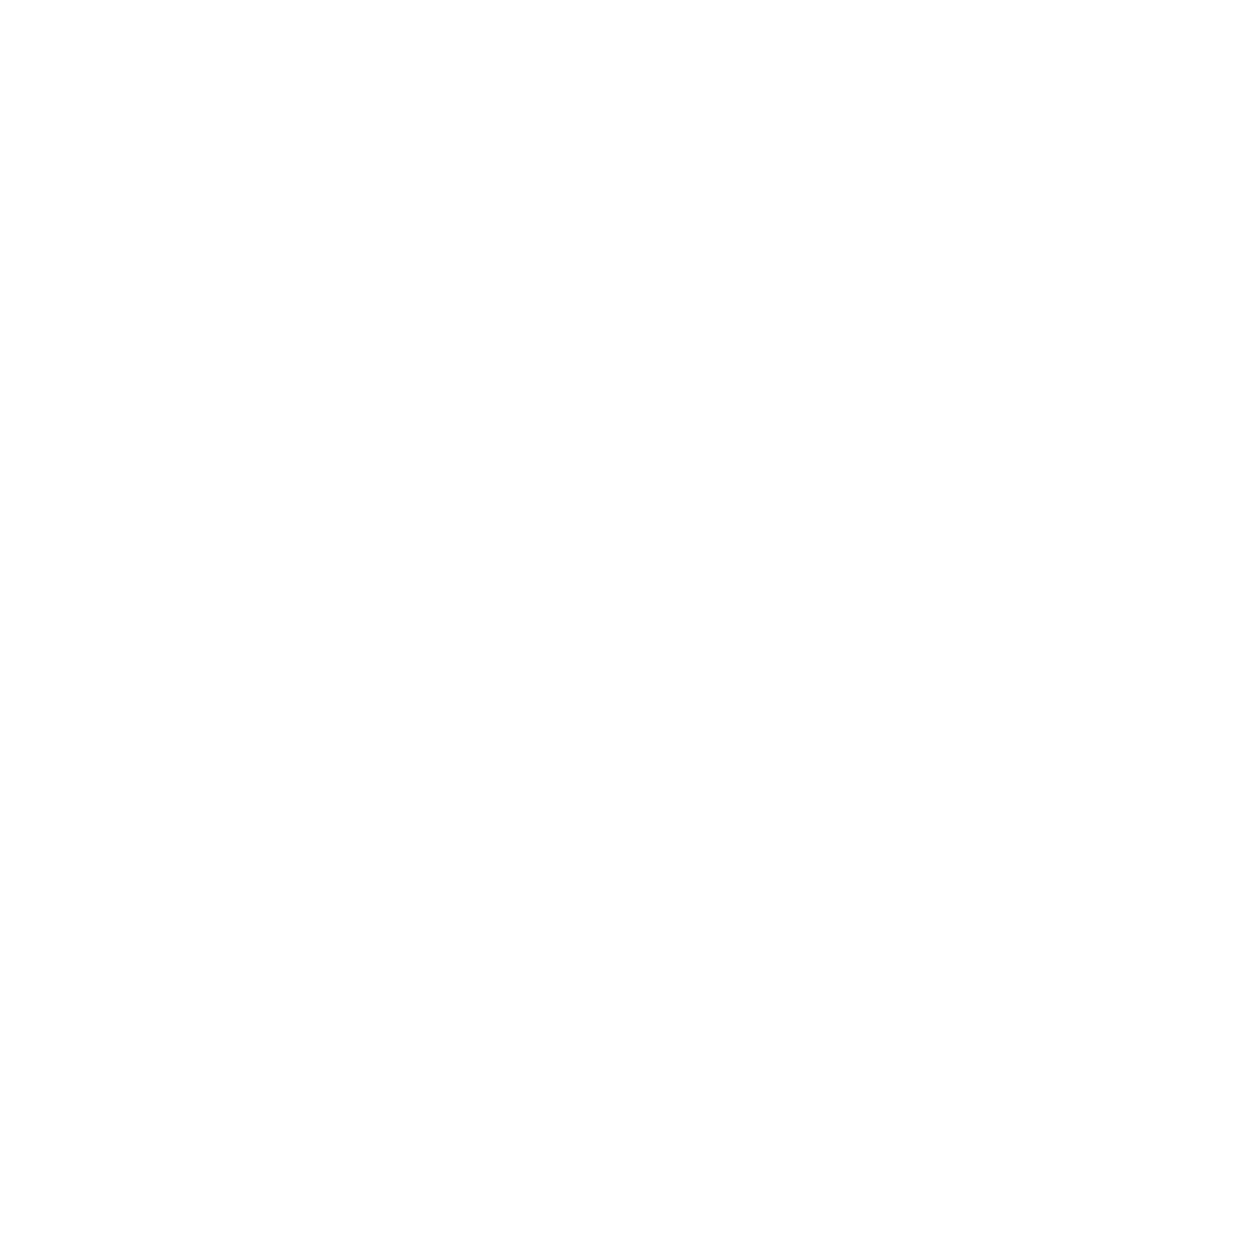

<IPython.core.display.Javascript object>


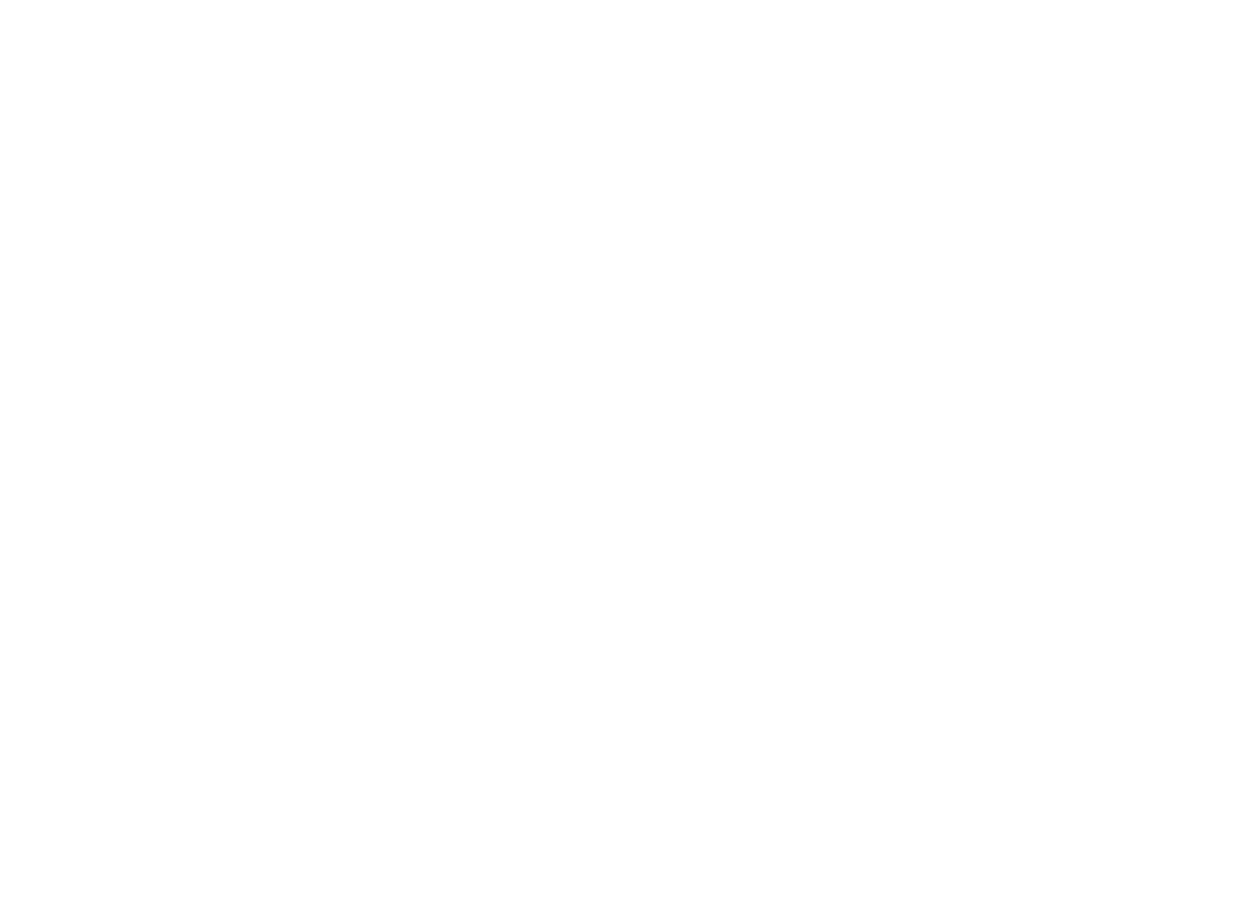

<IPython.core.display.Javascript object>


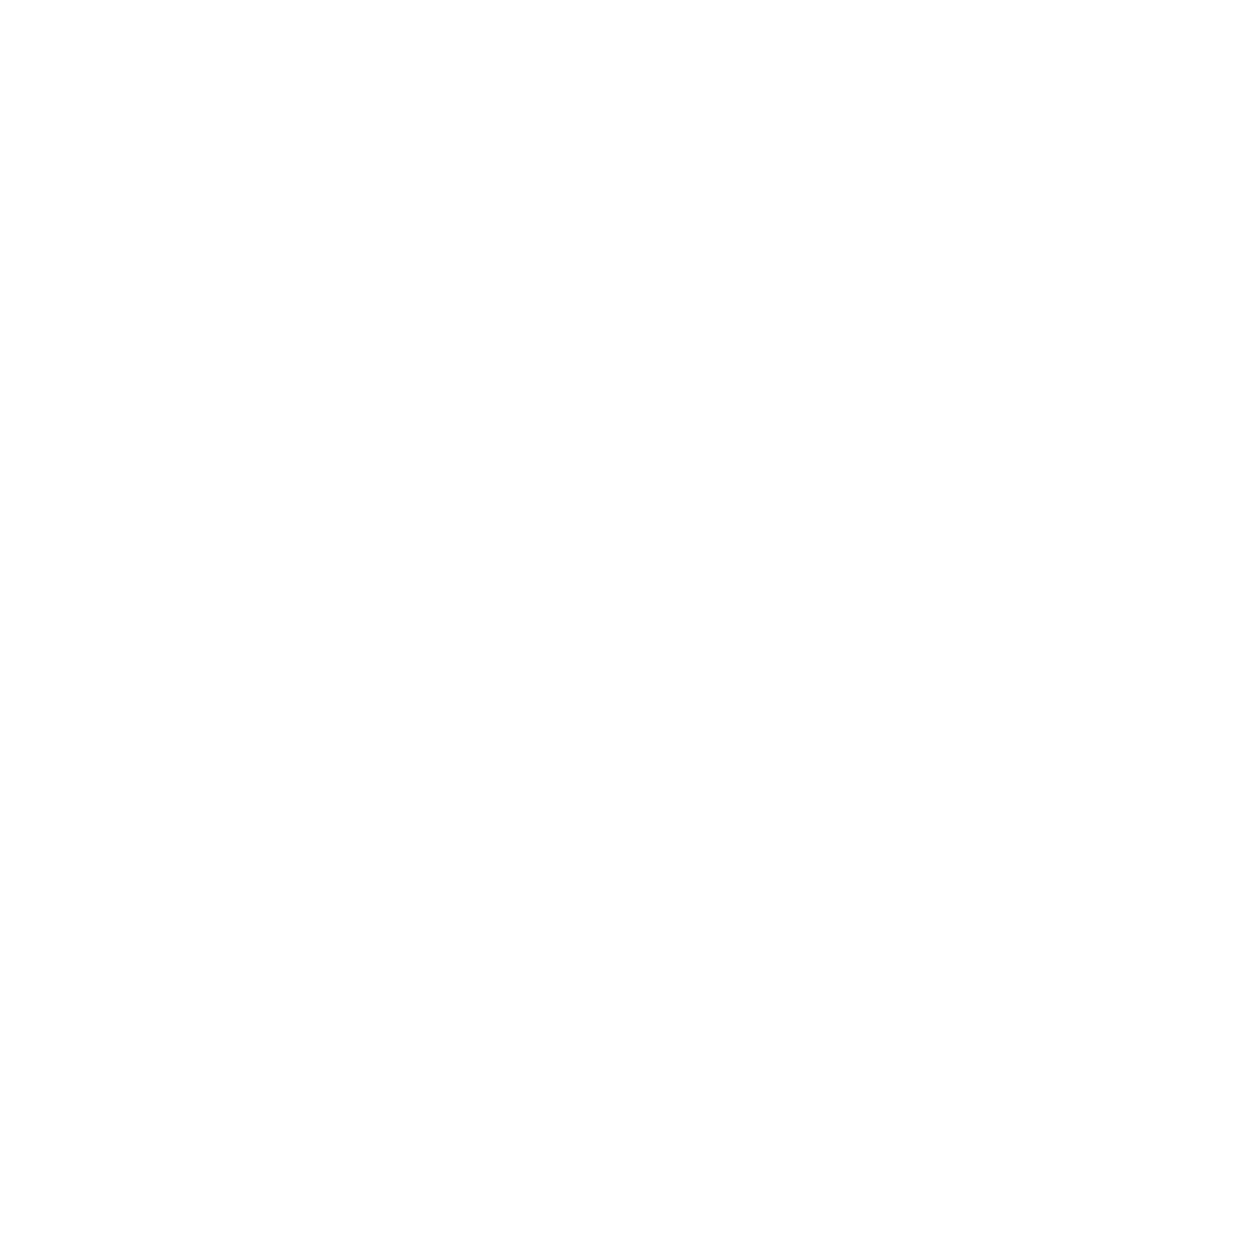

<IPython.core.display.Javascript object>


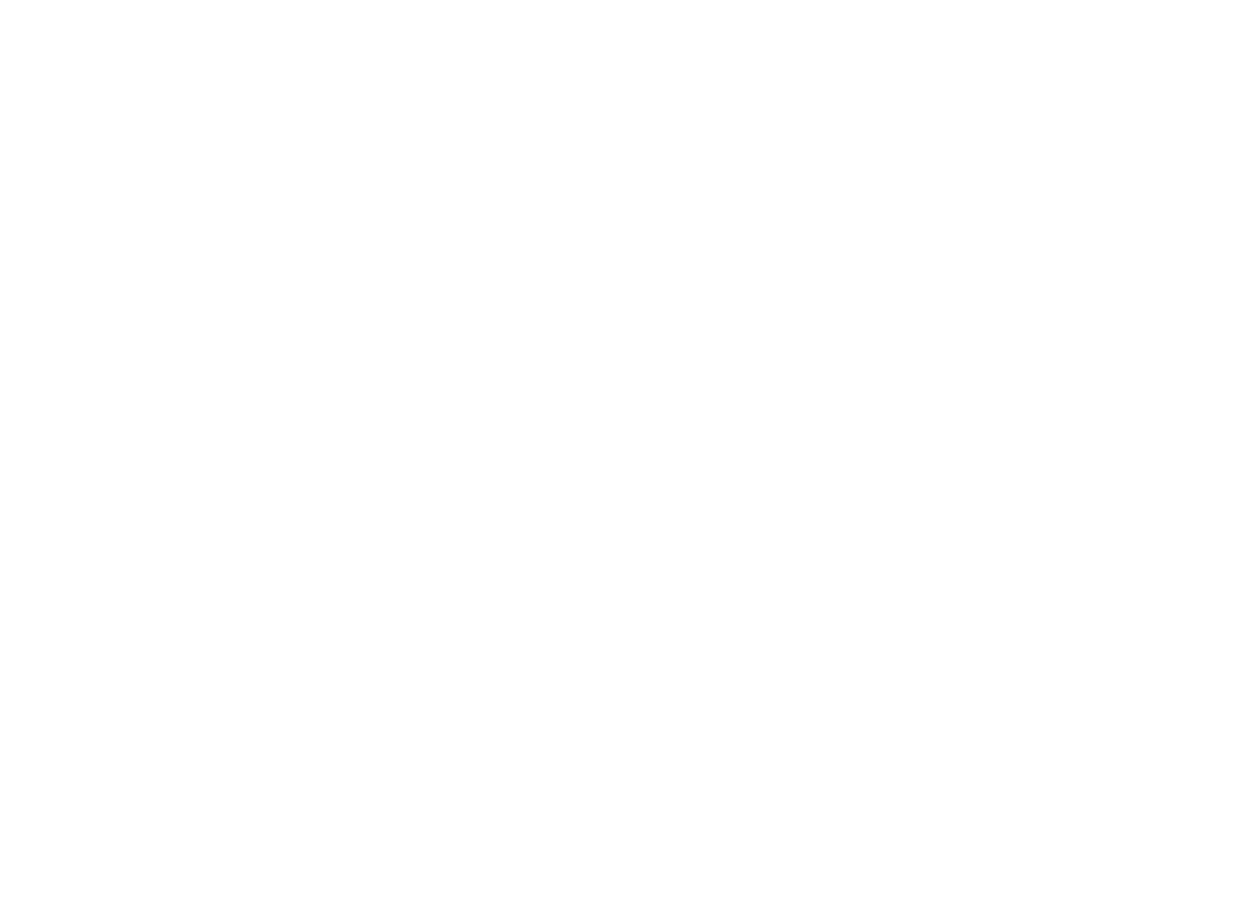

<IPython.core.display.Javascript object>


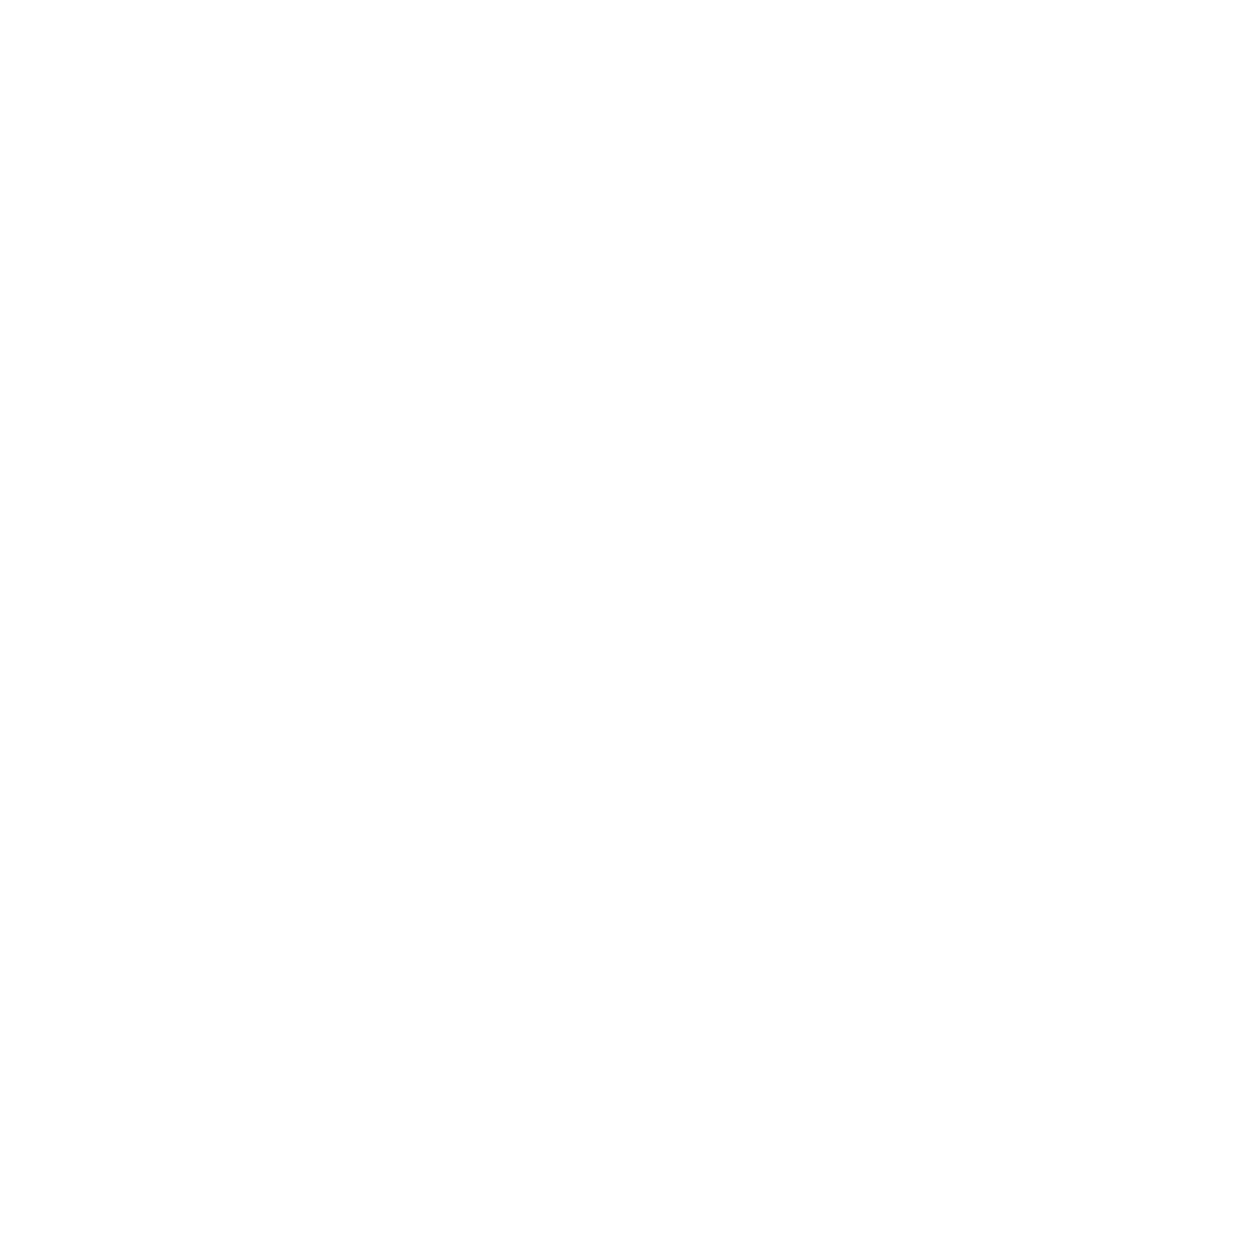

<IPython.core.display.Javascript object>


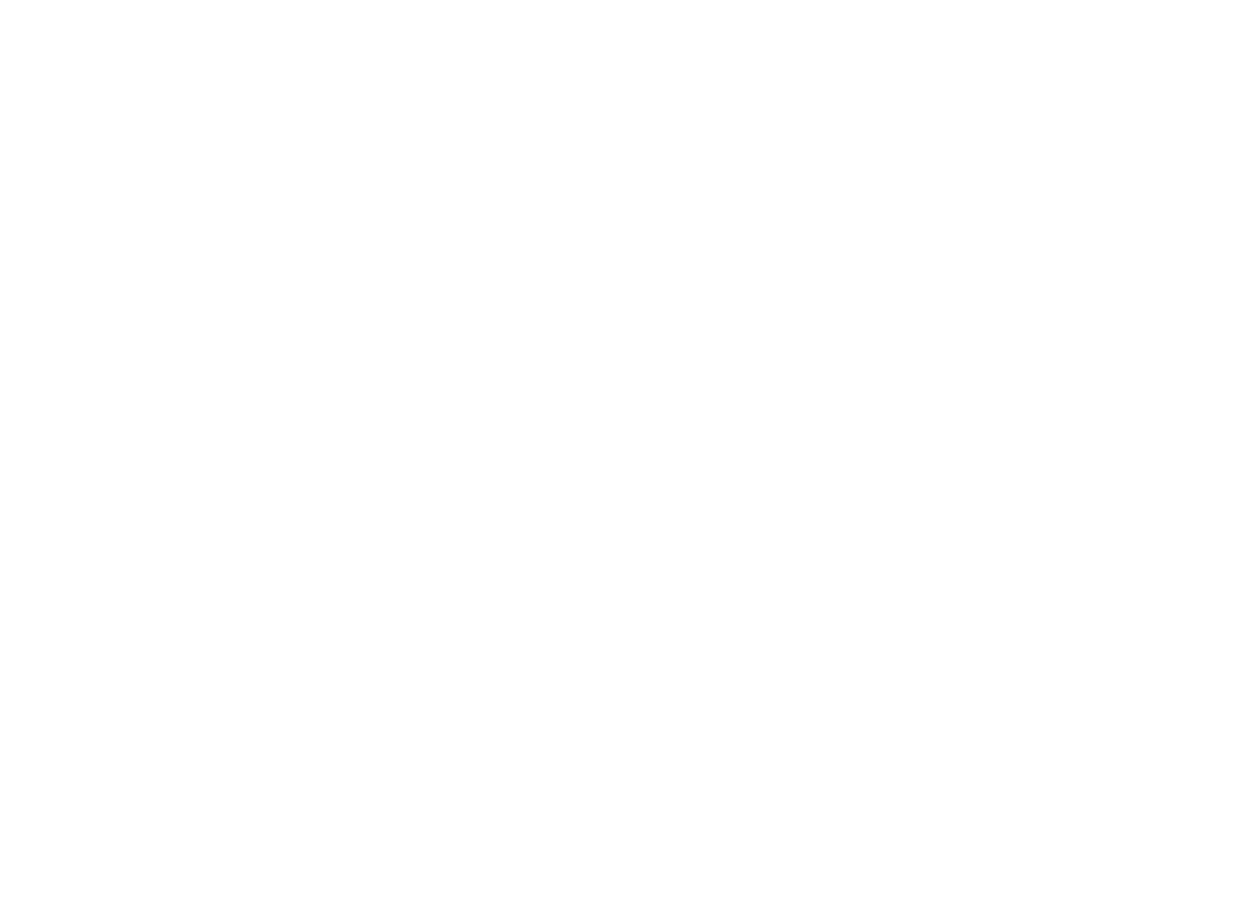

<IPython.core.display.Javascript object>


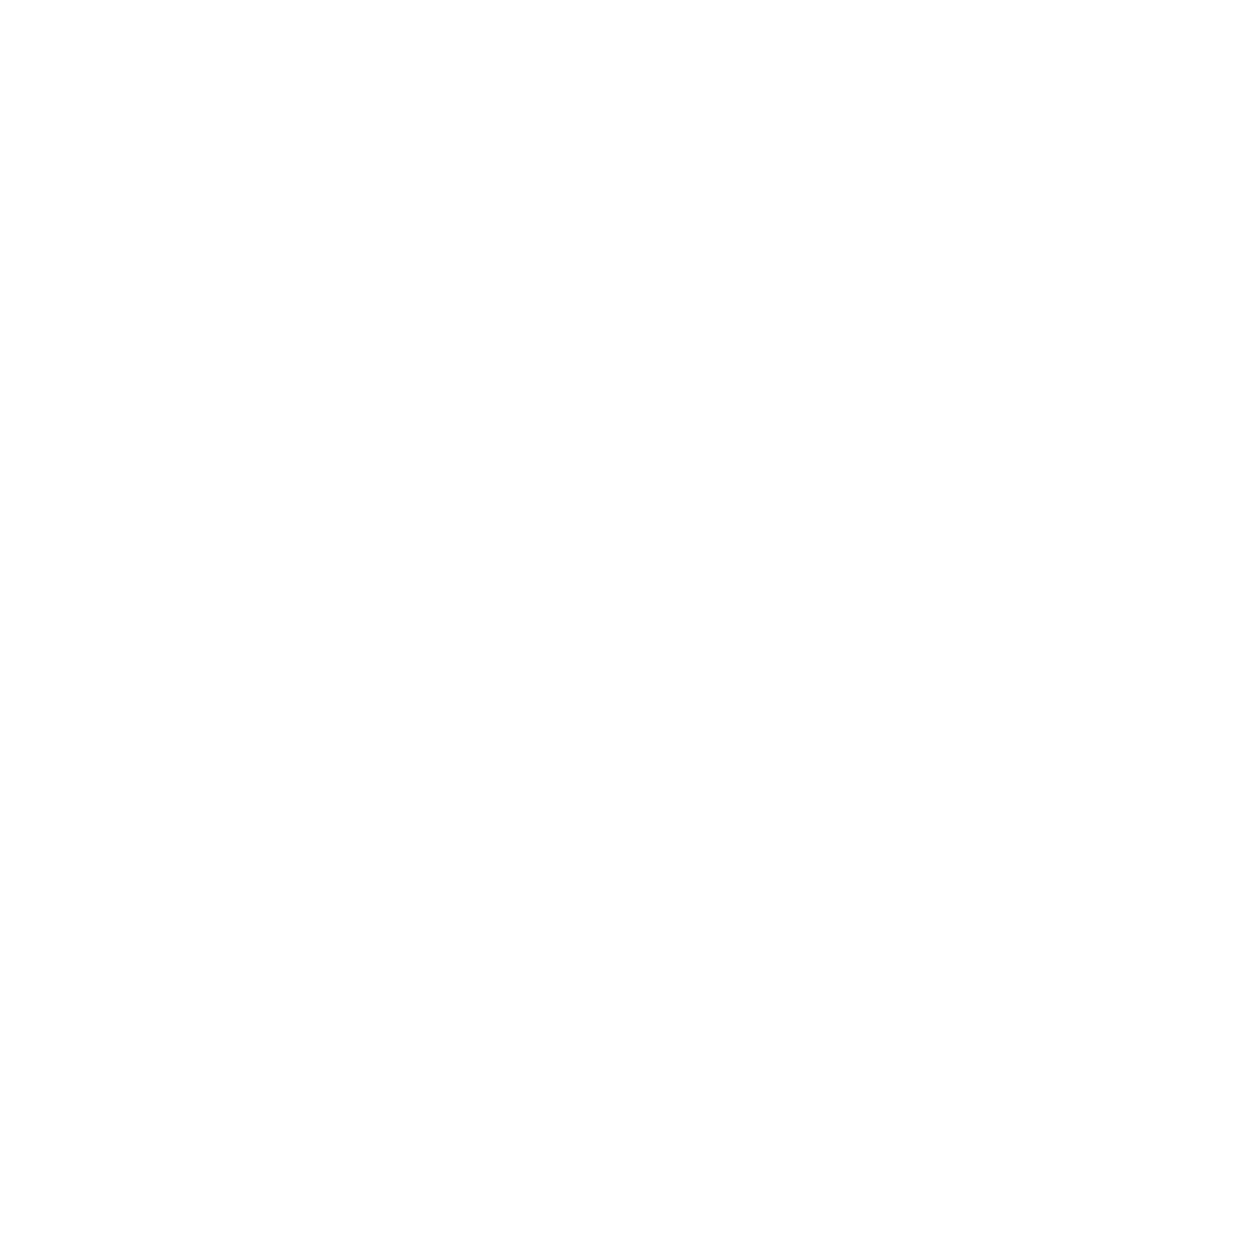

<IPython.core.display.Javascript object>


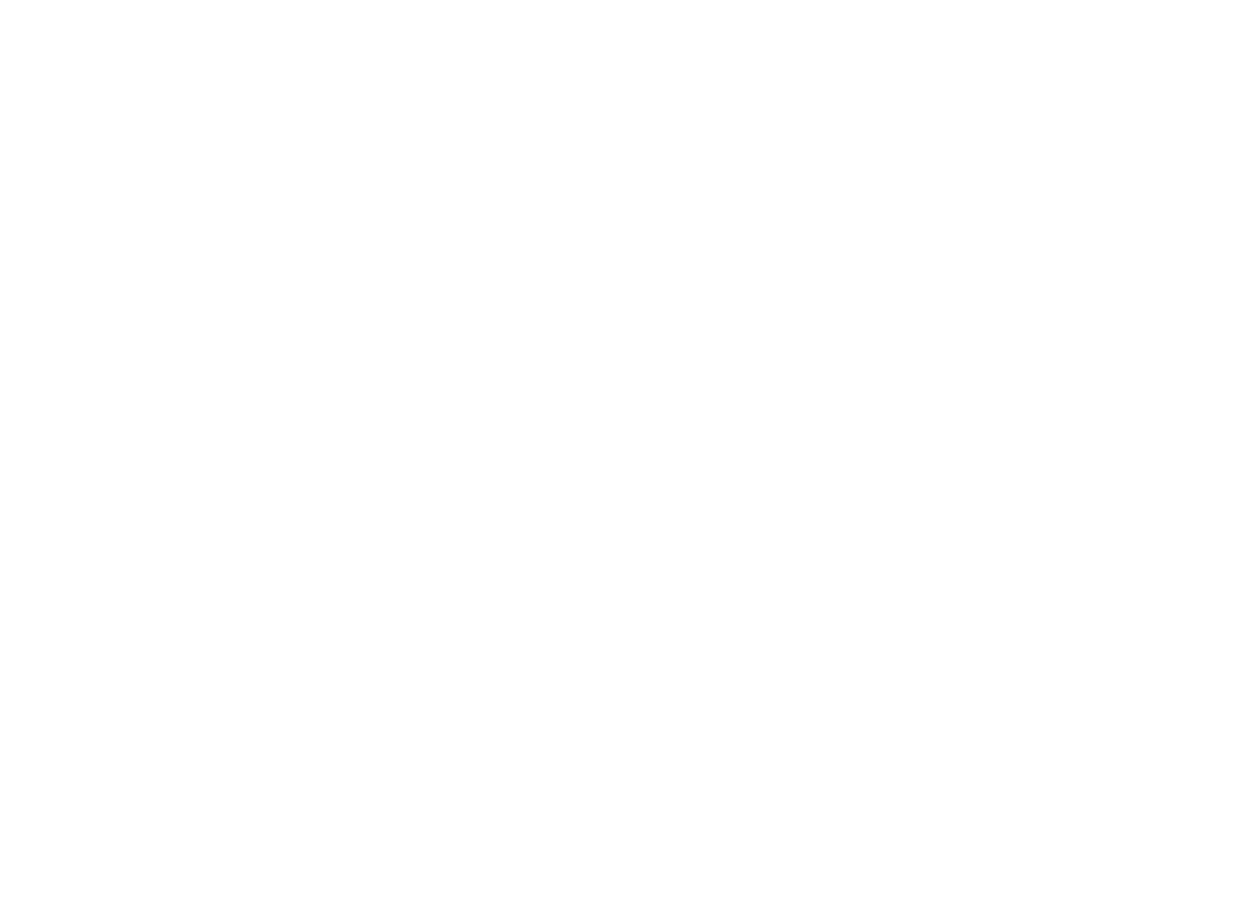

<IPython.core.display.Javascript object>


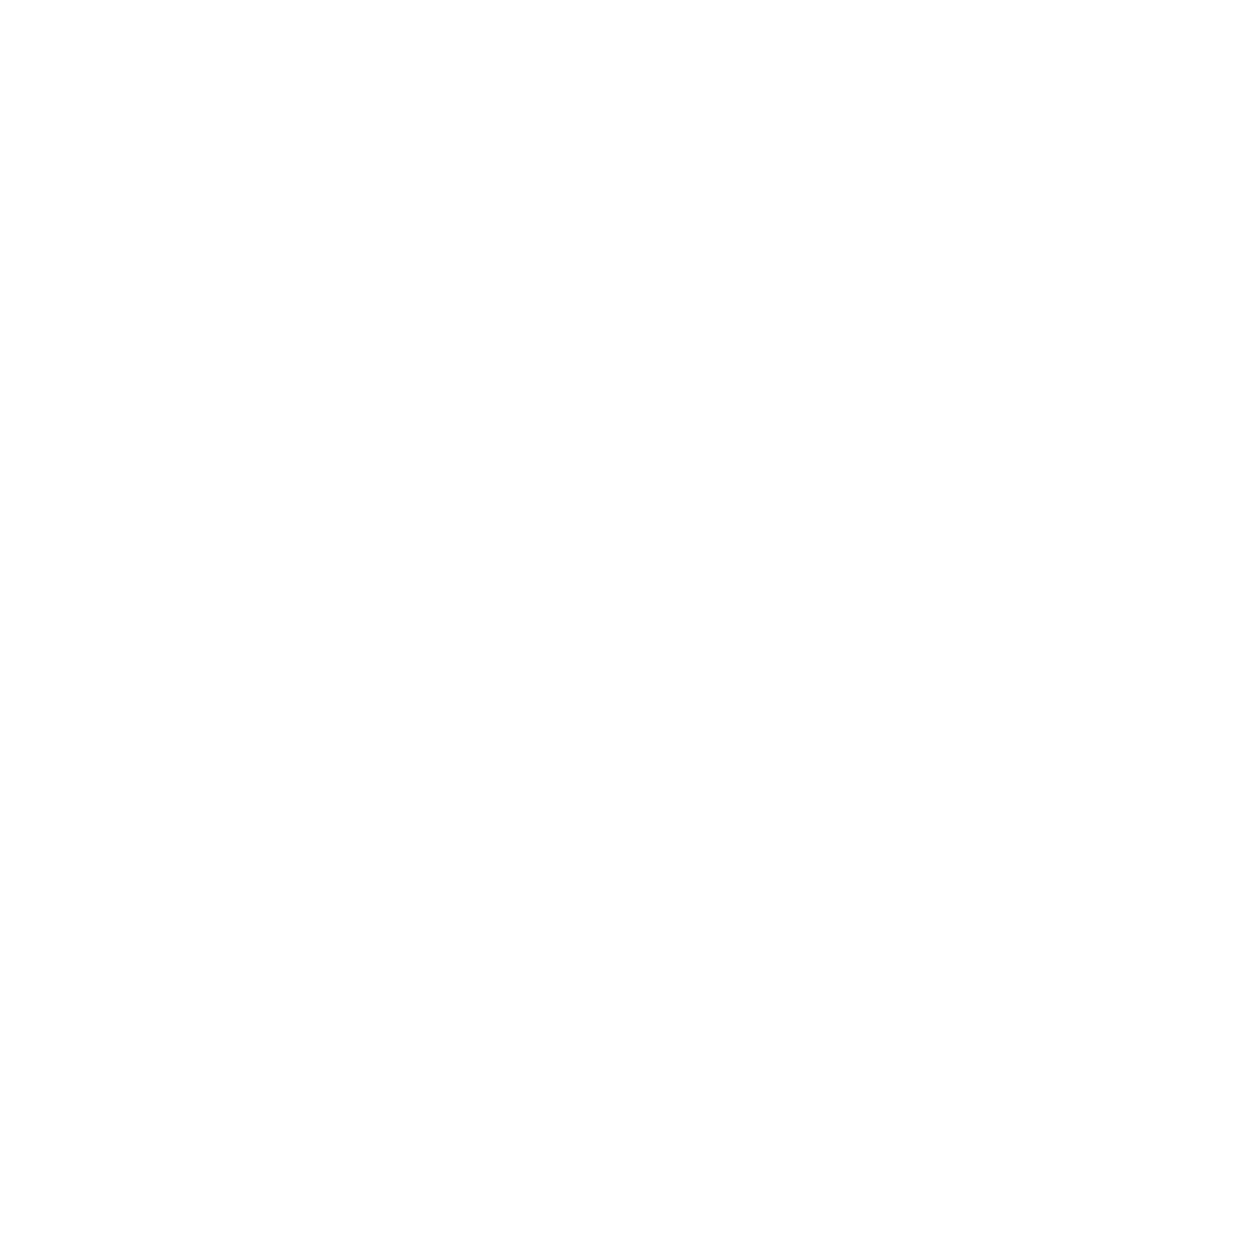

<IPython.core.display.Javascript object>


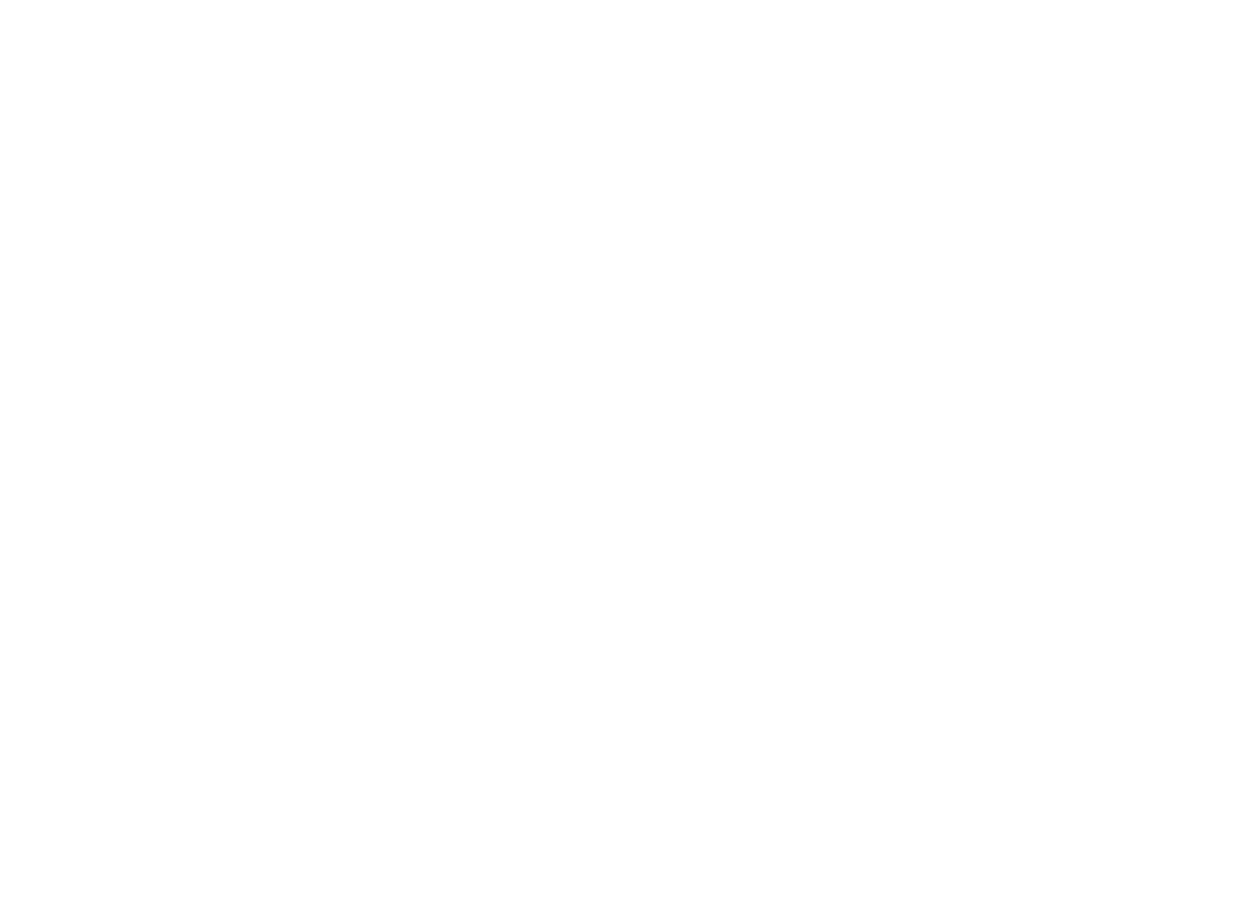

<IPython.core.display.Javascript object>


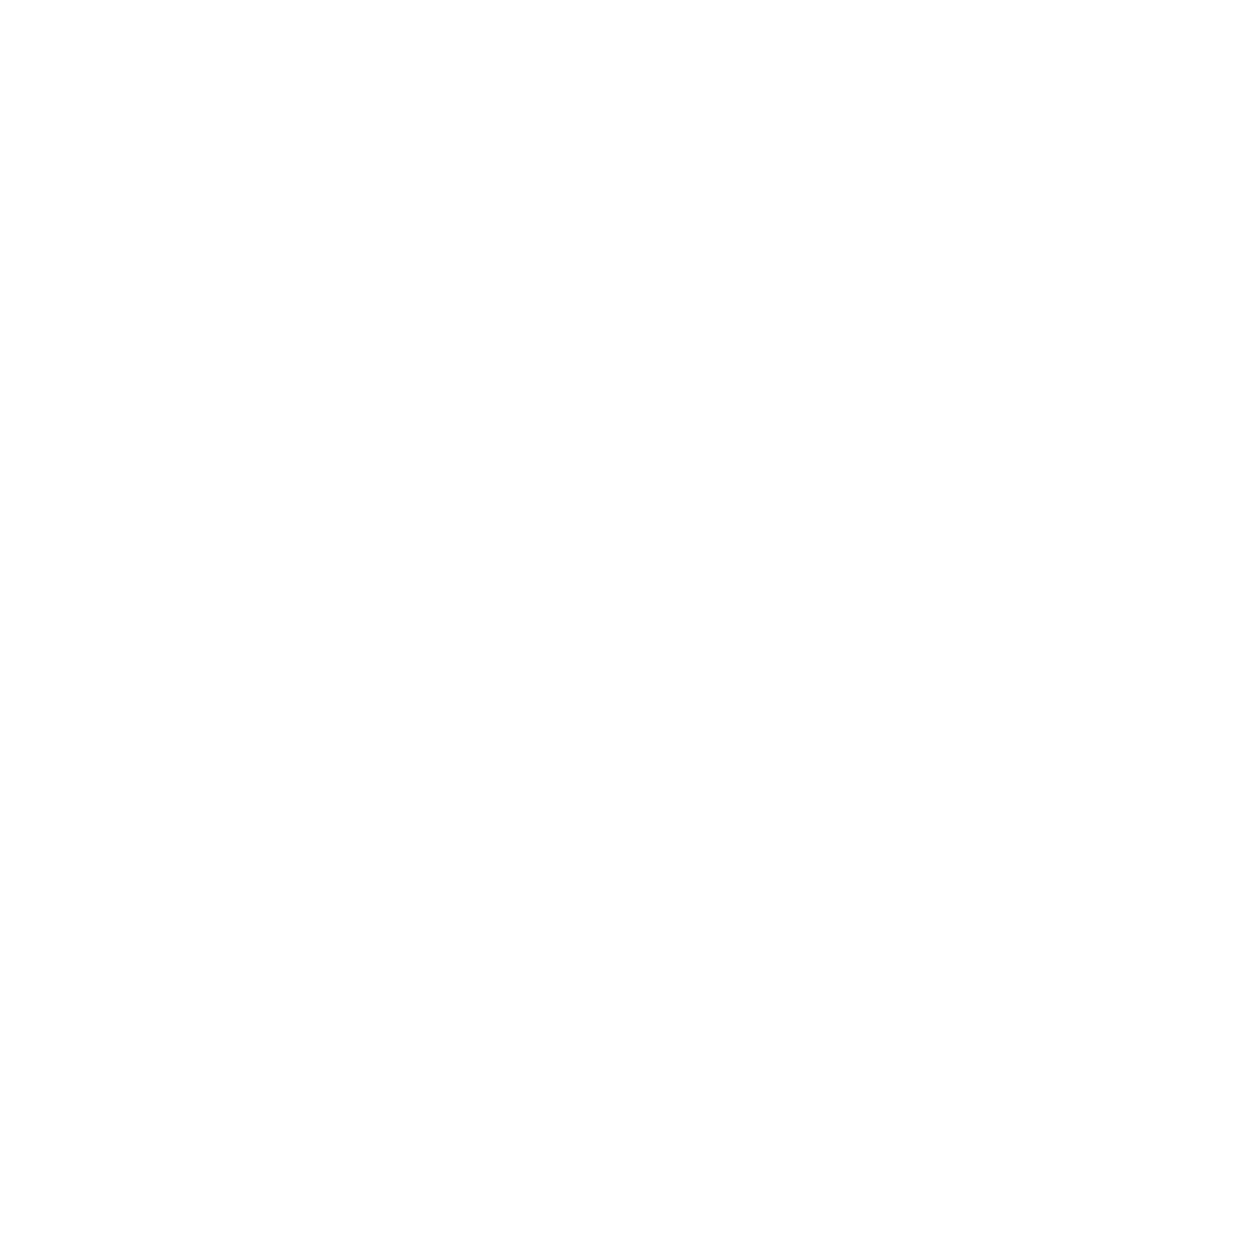

<IPython.core.display.Javascript object>


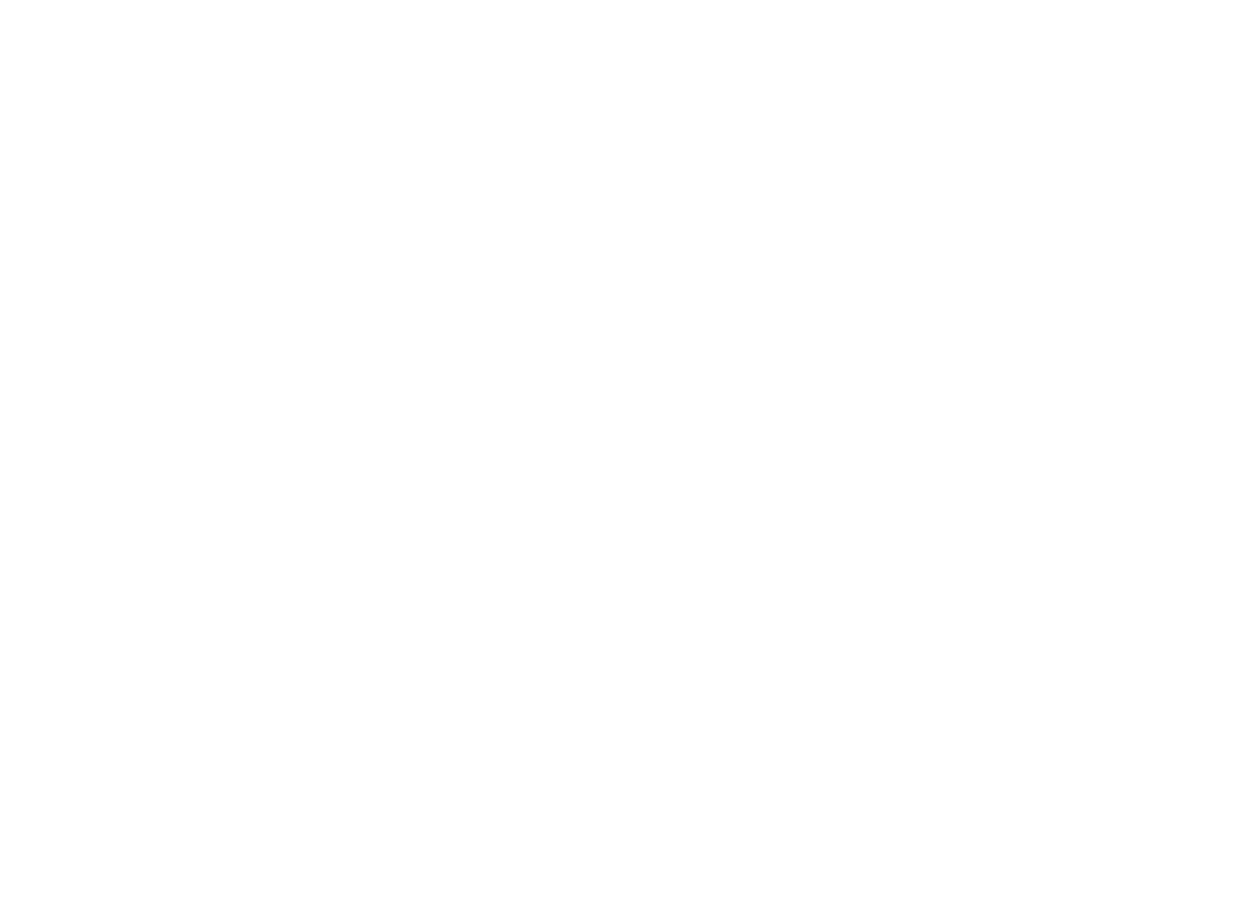

<IPython.core.display.Javascript object>


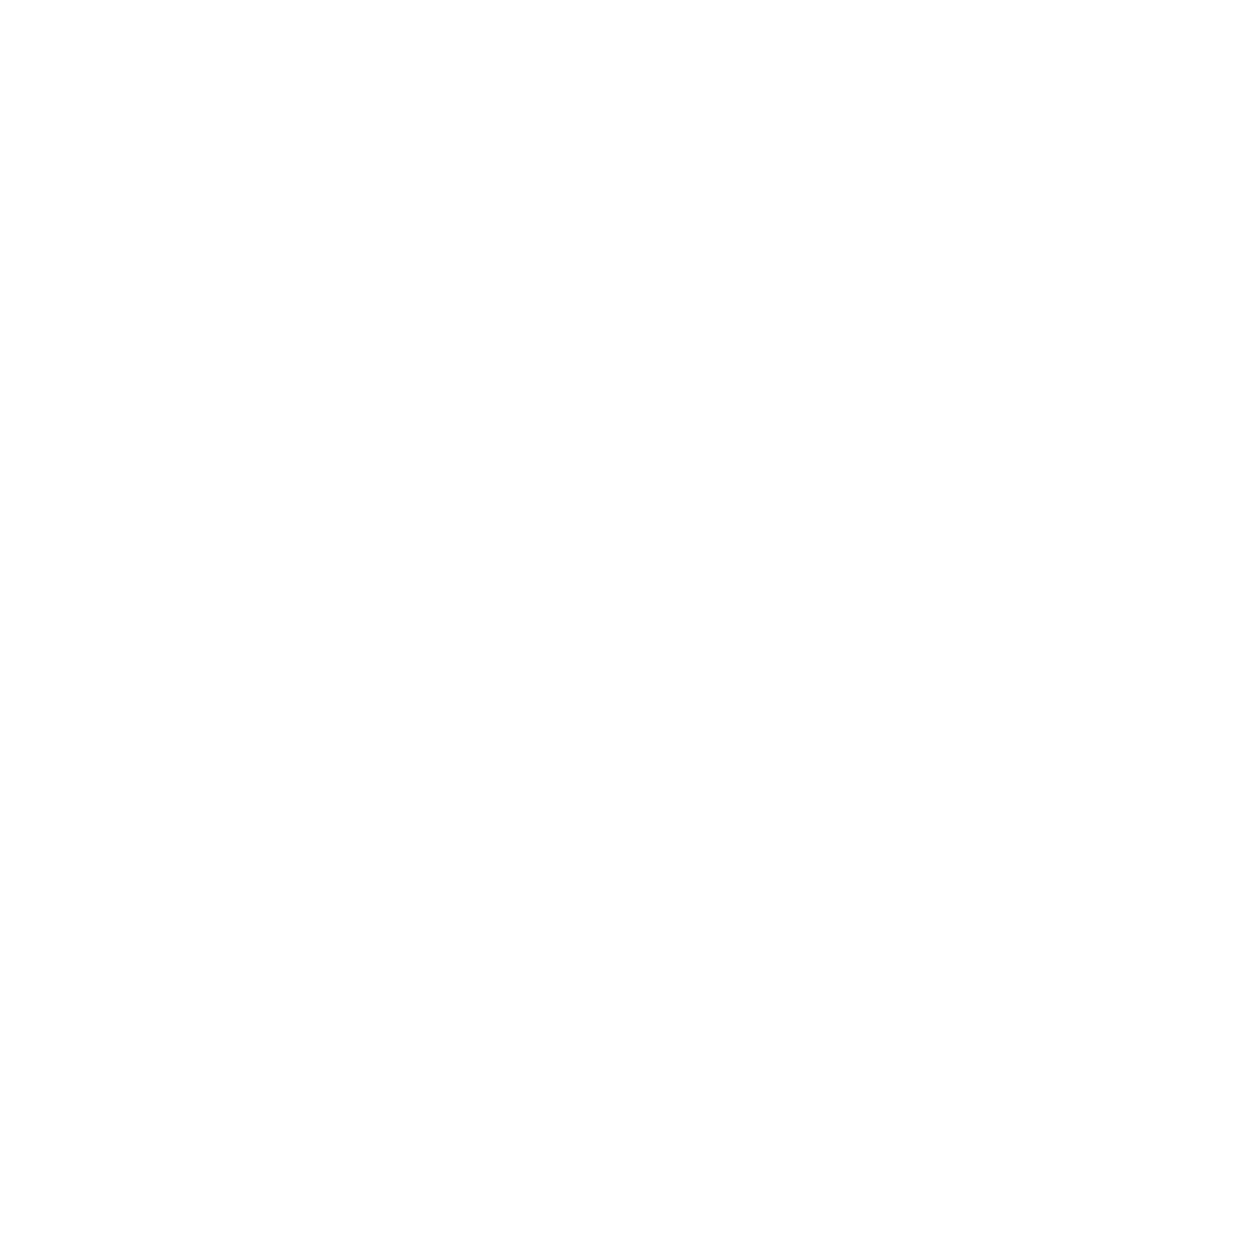

<IPython.core.display.Javascript object>


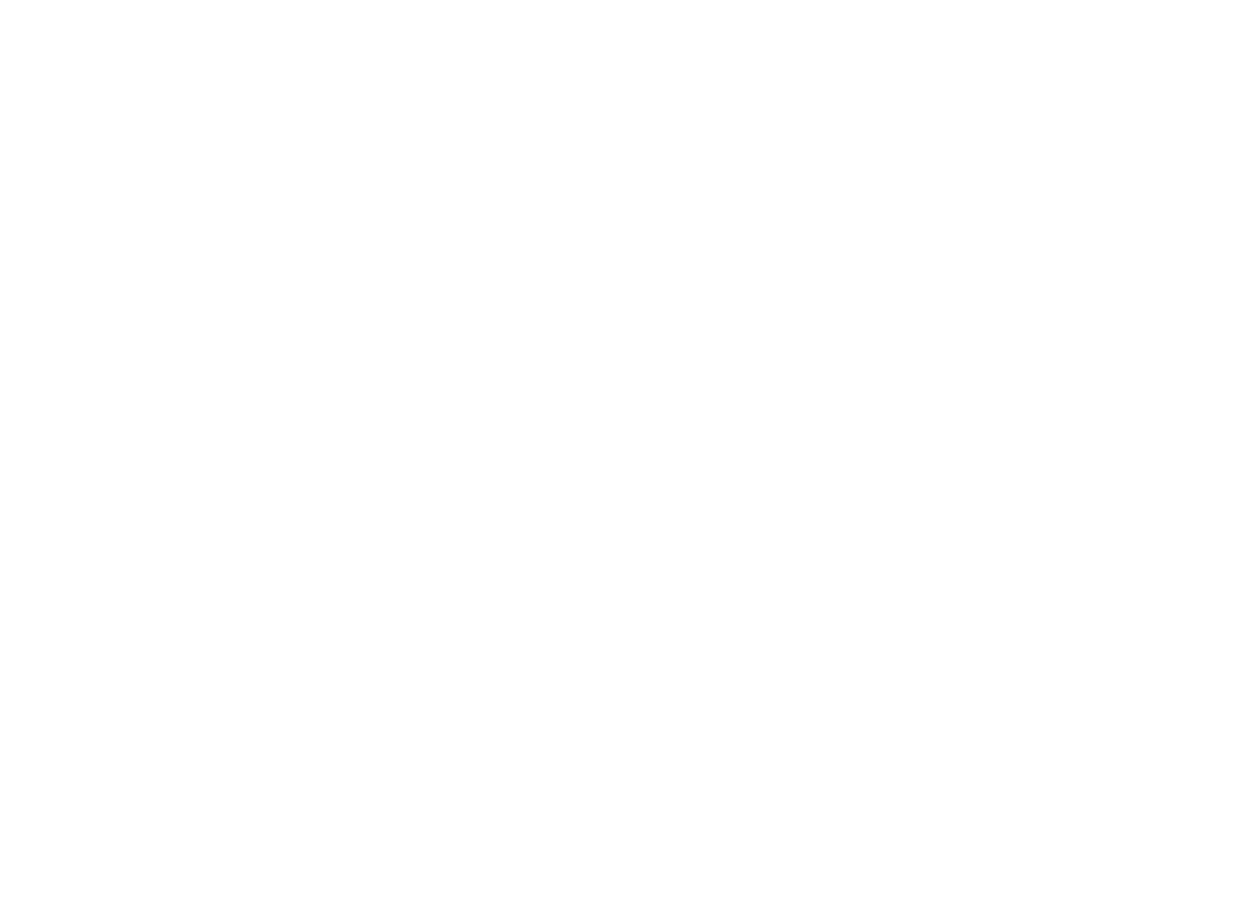

<IPython.core.display.Javascript object>


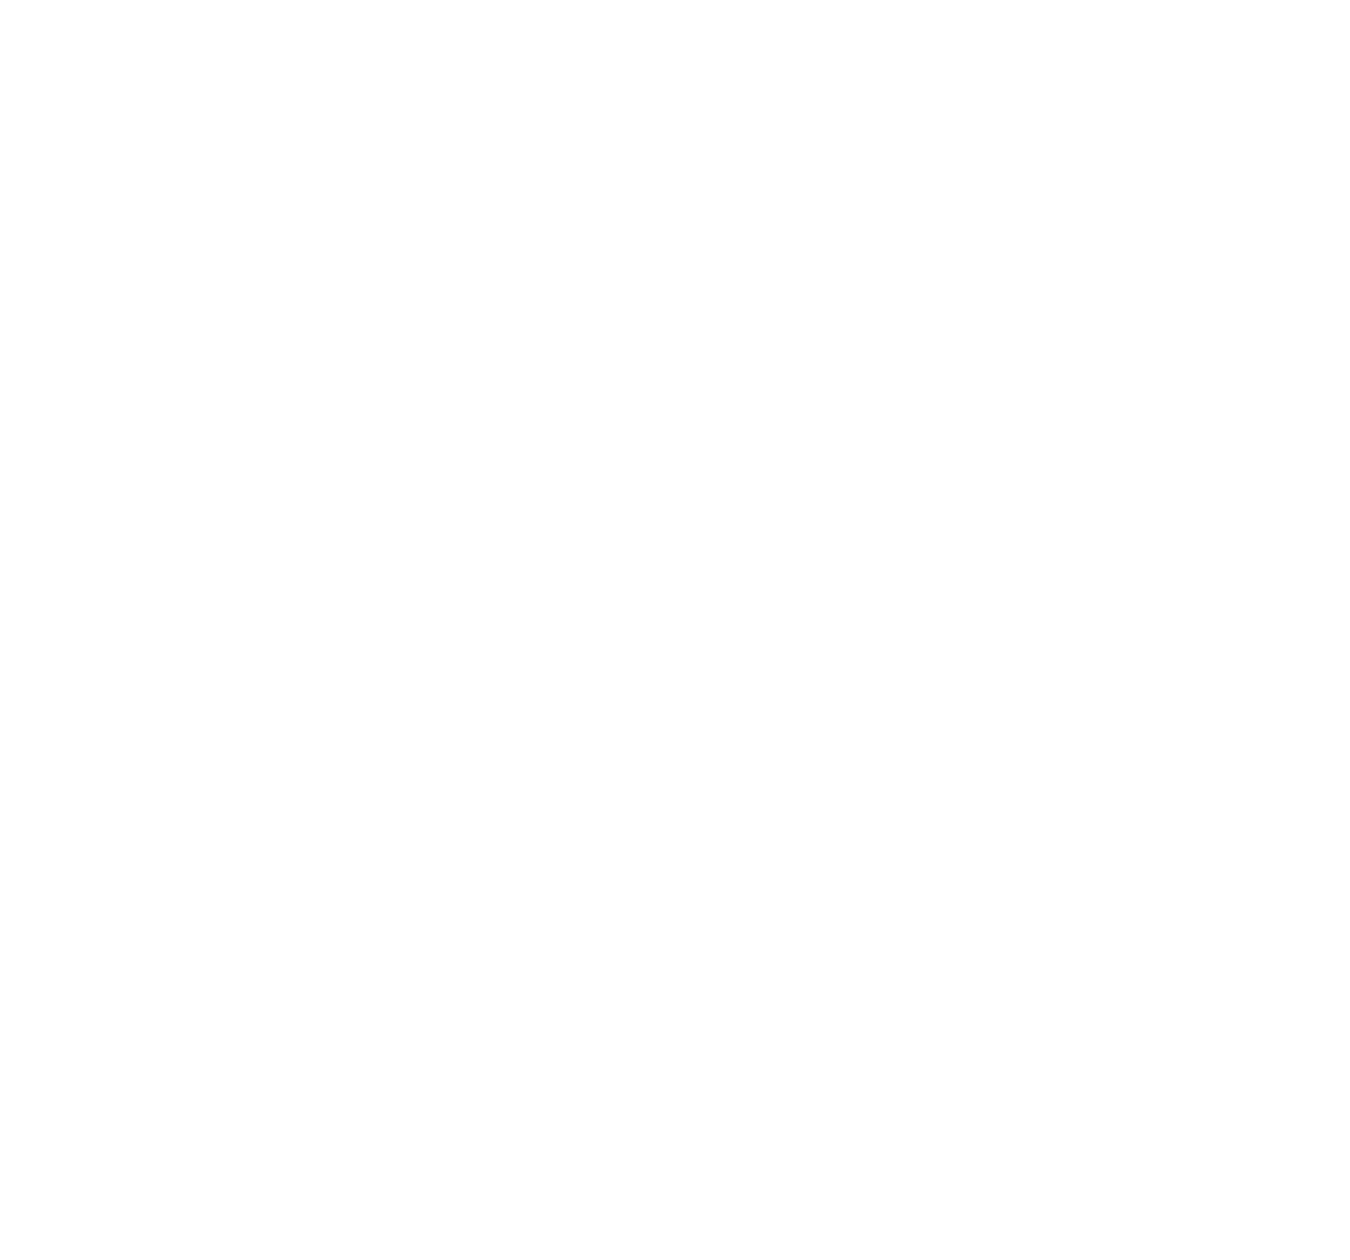

<IPython.core.display.Javascript object>


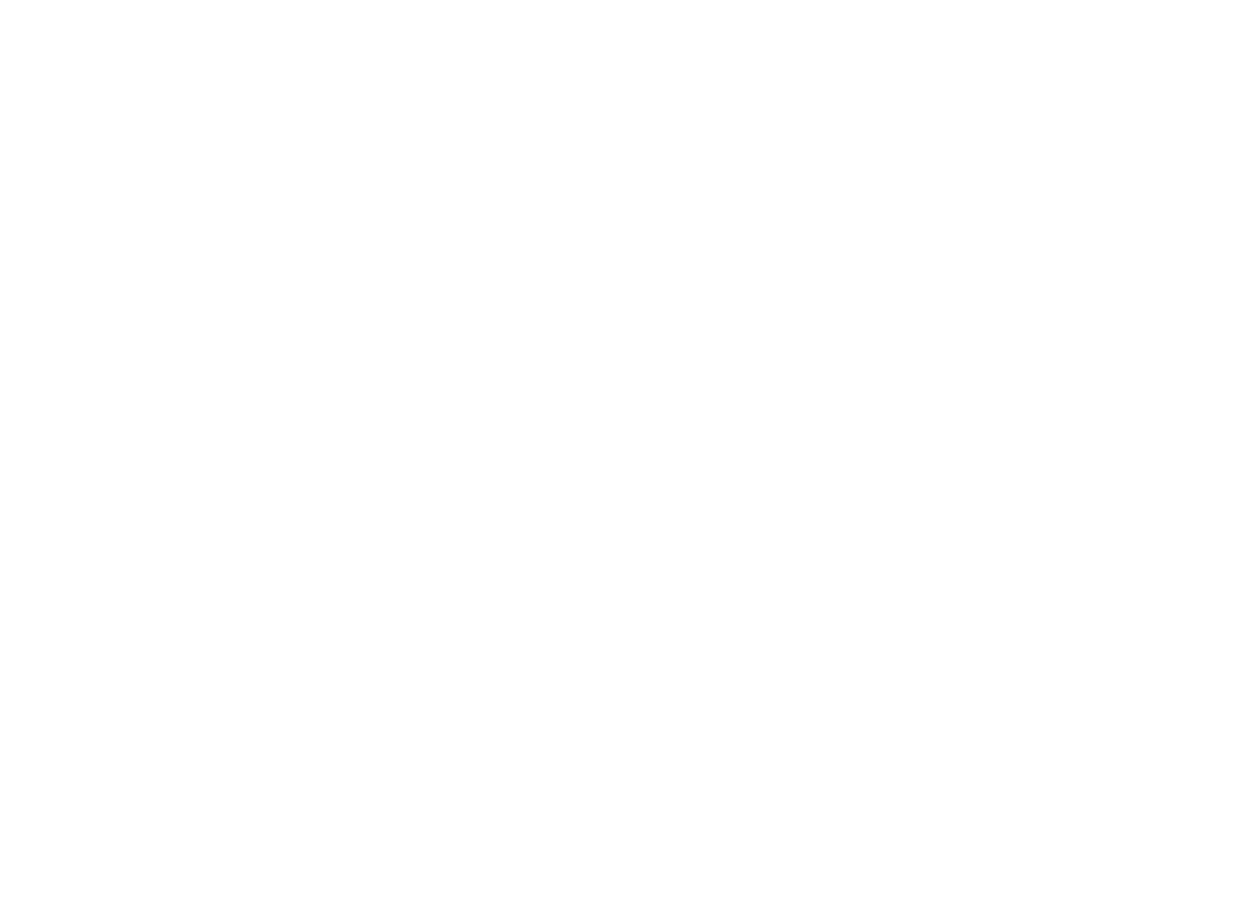

<IPython.core.display.Javascript object>


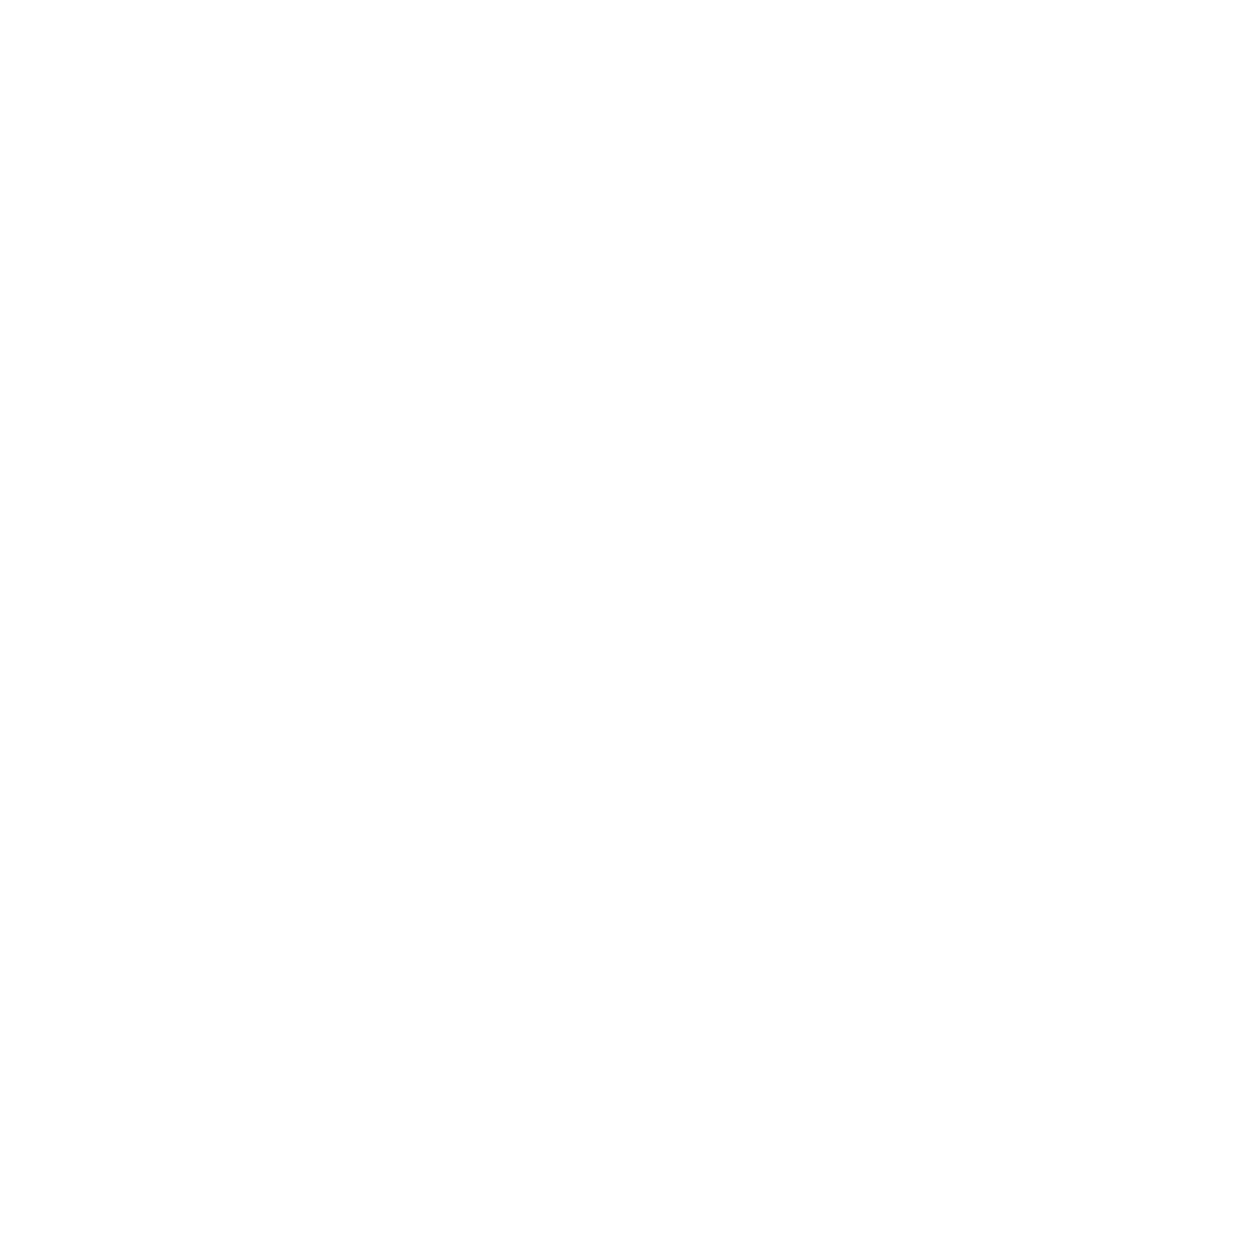

0


In [49]:
# %%time

# holoview object dictionary
hv_dict = {}





sns.set(font_scale=2.5)



granularity = 21
x_var = 'Economic: Left <-> Right{gaussian-ish}'
y_var = 'Social: Liberalism <-> Conservatism{gaussian-ish}'
x_axis = pan_dataset_allr_values.columns[0].replace("200",str(granularity-1)).replace("{uniform}","")
y_axis = pan_dataset_allr_values.columns[1].replace("200",str(granularity-1)).replace("{uniform}","")
pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values[x_var], q=granularity, labels=range(0,granularity))
pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values[y_var], q=granularity, labels=range(0,granularity))
x_axis_label = re.sub("(\{.*\})","",x_axis)
y_axis_label = re.sub("(\{.*\})","",y_axis)


#defaults
override_max_z_size = False
override_scale_text = False
region = None

# how find to make the output grids (output_granularityXoutput_granularity)

surf_plot_granularity =20
interp_plot_granularity =surf_plot_granularity*2
output_granularity=interp_plot_granularity*8


generate_dominance_plot = True
generate_heat_maps = True
heat_map_interpolation = 'bilinear'
generate_surface_plots = True

fs_dict = {'title':16,'labels':12,'ticks':10}
locator=MaxNLocator( nbins=4)
# 
min_sample_size =100    
smoothing = 50.0
highest_overrep_factor =0

num_legend_columns = 5
max_wave = 17

# if break_single_variable then split a single categorical variable into a set of dummy variables
# if not break_single_variable then default to original format (like variables with a specific set of dropped categories)
break_single_variable = True

# if abbreviate_variables then shorten some of the names (e.g. party names shortform) AND REMOVE THE STUB (ptv/like)
abbreviate_variables = False
# we get errors if you don't do this with parties
# split this
shorten_party_names = False
# assign colours to any category not already covered
auto_update_colour_list = True
# legend contains all options not just dominant ones
# may be necssary for holoviews since legend hooks only apply last value
legend_includes_all_options = True
# keep the supplied category order rather than basing it on frequency
ordinal_variable = False


# ["nan"]
# ['Any other Asian background', 'Prefer not to say', 'Other ethnic group','White British','Black African']
# ["Other local daily morning newspaper","The Western Mail","The Independent","Other Newspaper","None"]#["Don't know","5"]


# add gridlines for underling value distribution (mostly flat)
pop_gridlines = False

# colours vary in alpha relative to the absolute/relative value of the underlying variable
# e.g. where parties are strongest their color is very opaque shading to white where weak
colour_fade = False

# normalize_heights is true -> forces colours to range from min_surface_value and max_surface_value
# not compatible with holoviews holomap output
normalize_heights = False

# within each (granularityxgranularity) gridpoint, use bes values for weighting
# one more reason to try to keep granularity low enough that this subsample is "reasonable"
use_bes_weights = True

# for BES variables with explicit waves, store the number, use the friendly description for the title
bes_wave_based = False

# if normalise_to_category_size true then rescale categories *as if they were the same size*
# i.e. you're not looking at absolute values but values *relative to that categories average*
normalise_to_category_size = False

# attempt to automatically generate visually distinct colours - NOT WORKING!
use_dist_cols = False
# create a set of al_scale/lr_scale values *normalised to the BES weight distribution for a specific wave*
use_wave_weighted_values = False

# one cmap to rule them all
constant_cmap = True



# specify a region of the UK to limit the analysis to (None|"England"|"Scotland"|"Wales")
# region = "England"
region = "England"
region=None
BES_Panel["id"] = BES_Panel.index

##### MANUAL ADDITION
# stub_var = "partyId"
# stub_var,title_base = "generalElectionVote","Which party would you vote for?"
stub_var,title_base,max_overrep_factor,treatment_spec_name = ("2017GE",
    "Where did the Conservatives' 2019 Vote Come From?",
    7,
    "CON2019FROM")
# if drop_cats then drop specific categories after dummying
##### MANUAL ADDITION
drop_cats = ["UNK","CON"]    
specific_mask = BES_Panel["2019GE"]=="CON"

# title_base = "How much do you like or dislike each of the following party leaders?\n(Highest shown)"
# override_scale_text = "0- Strongly dislike, 10- Strongly like"
# otherwise it will guess by looking at values (value/None)
# override_max_z_size = 10.0

if normalise_to_category_size:
    scale_text = 'Overrepresentation factor'
else:
    scale_text = 'Probability of choosing option'
if override_scale_text:
    scale_text = override_scale_text

cbar_text = "Dominant Option (in territory size order)"



if use_bes_weights:
    aggfunc = weighted_mean
else:
    aggfunc = np.mean


if region is not None and specific_mask is None:
    specific_mask = (BES_Panel["country"]==region)# & (BES_Panel["profile_eurefvote"]=="Leave the EU")
else:
    specific_mask = BES_Panel["id"].notnull() # everything



if specific_mask.sum()==0:
    raise Exception()

skip_waves = [5]
skip_waves = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,13,15 ]
skip_waves = [1,2,3,4,5, 7, 9, 13]
skip_waves = [5,6,9,12]
# [1, 2, 3, 4, 7, 8, 10, 11][4, 6, 10, 11, 15] [1, 2, 3, 4, 6, 7, 12, 14]
skip_waves = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16 ]
skip_waves = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
skip_waves = []
wave_list = ["W"+str(x) for x in list(range(1,max_wave)) if x not in skip_waves]
# wave_list = [str(x) for x in [2005,2010,2015,2017]]
wave_list=  [""]

## calculate total party list
# and give it a frequency based order
if break_single_variable:
    if ordinal_variable:
        df_temp = BES_Panel[search( BES_Panel, stub_var+"("+"|".join( wave_list )+")").index][specific_mask].apply(lambda x: x.value_counts())        
        cat_order = BES_Panel[search( BES_Panel, stub_var+"("+"|".join( wave_list )+")").index[0]].cat.categories
        all_wave_party_list = [x for x in cat_order if x in list(df_temp[df_temp>=min_sample_size].dropna(how ='all').sum(axis=1).sort_values(ascending=False).index)]            
    else:
        df_temp = BES_Panel[search( BES_Panel, stub_var+"("+"|".join( wave_list )+")").index][specific_mask].apply(lambda x: x.value_counts())
        all_wave_party_list = list(df_temp[df_temp>=min_sample_size].dropna(how ='all').sum(axis=1).sort_values(ascending=False).index)
    

else:
    temp = match(BES_Panel,stub_var+"(.*)"+"("+"|".join( wave_list )+")"+"$", mask = specific_mask)
    party_list = list(temp[temp>min_sample_size].index)
    party_list = [x for x in party_list if re.match(stub_var+"(.*)W\d+$",x).groups()[0] not in drop_cats]
    list(pd.unique([re.match(stub_var+"(.*)W\d+$",x).groups()[0] for x in party_list if re.match(stub_var+"(.*)W\d+$",x).groups()[0] not in drop_cats]))
    # ["CandA","CandB","SNPExtra",'expgrp', 'ConExp', 'LabExp', 'LDExp', 'UKIPExp', 'GrnExp']
    # party_list    
if shorten_party_names:
    all_wave_party_list = [replace_dict[x] for x in all_wave_party_list]    

for wave in wave_list:
    print("Processing wave: ",wave)
    if bes_wave_based:
        wave_no = int(wave.replace("W",""))
        title_extra = "\n"+wave_descriptions.loc[wave_no].values[0]#+"; "+region#+"&Leave-2016"
    else:
        title_extra = "\n"+wave#+"; "+region#+"&Leave-2016"

# treatment = "brexitself_surface"
#     treatment = "ptv_surface"+wave+"_" + region# + "_LEAVE2016"
    if treatment_spec_name is None:
        treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    else:
        treatment = treatment_spec_name+wave
    
    if region is not None:
            treatment = treatment+"_"+region
            title_extra = title_extra+"; "+region


# party_list = ["Lab","Con","LD","Grn","UKIP","TIG","BrexitParty"]
# party_list = ["ptv"+x for x in party_list]
# party_list = ["brexitSelf"]
    if break_single_variable:
        if (stub_var+wave) not in BES_Panel.columns:
            continue # variable not present in wave
        if drop_cats:
            df1 = pd.get_dummies(BES_Panel[stub_var+wave].cat.remove_categories(drop_cats))
            df1.loc[BES_Panel[stub_var+wave].apply(lambda x: x in drop_cats or pd.isnull(x)).replace(np.nan,False),:]=np.nan
        else:
            df1 = pd.get_dummies(BES_Panel[stub_var+wave])
        mask = BES_Panel[stub_var+wave].notnull() & df1[df1.columns[0]].notnull() & specific_mask
#     eurevote_col_replace_dict = {"Don't know":"Don't know", "I would/will not vote":"Won't vote", "Leave the EU":"Leave",
#                   "Stay/remain in the EU":"Remain"}
        # drop columns that don't reach minimum sample size
        temp = df1[mask].sum()
        df1 = df1[temp[temp>min_sample_size].index]
    
        if shorten_party_names:
            df1.columns = [replace_dict[x] for x in df1.columns]
        party_list = df1.columns

    else:
    ## sample size!
#         temp = match(BES_Panel,"like(.*)"+wave+"$", mask = specific_mask)
#         party_list = list(temp[temp>min_sample_size].index)
#         party_list = [x for x in party_list if re.match("like(.*)W\d+",x).groups()[0] in ["Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG"]]
        if len(match(BES_Panel,"blaH", mask = specific_mask))==0:
            continue # variable not present in wave
        temp = match(BES_Panel,stub_var+"(.*)"+wave+"$", mask = specific_mask)
        party_list = list(temp[temp>min_sample_size].index)
#         party_list = [x for x in party_list if re.match(stub_var+"(.*)W\d+",x).groups()[0] not in ["CandA","CandB","SNPExtra","Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG","DUP"]]        
        party_list = [x for x in party_list if re.match(stub_var+"(.*)W\d+$",x).groups()[0] not in ["CandA","CandB","SNPExtra",'expgrp', 'ConExp', 'LabExp', 'LDExp', 'UKIPExp', 'GrnExp']]
#         print(party_list)
#     temp = match(BES_Panel,"ptv.*"+wave+"$", mask = specific_mask)
#     party_list = list(temp[temp>min_sample_size].index)
    
    
    output_subfolder = create_subdir(BES_output_folder, treatment)
    
    # specific_mask = 1

    interp_dict = {}

    largestN = 0


    for party in party_list:
#         print(party)
    #     like_var = "ptv"+party
        like_var = party

        like_name = "probability to vote "+party
#         scale_text = ' 0-Very Unlikely, 10-Very Likely'
        title_text = title_base+":\n"+like_var+title_extra
#         title_text = "Which party do you feel closest to: "+like_var+"?"+title_extra
        

    #     like_name = "Some people want to leave the European Union immediately without a deal.\nOther people would like to cancel Brexit and remain in the EU.\nWhere would you place yourself and the political parties on this scale?"
    #     scale_text = ' 0-Leave the EU without a deal, 10-Remain in the EU'    
    #     title_text = like_name



        # mean across all waves
    #     mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
    #     .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)

#         mean_like_Corbyn = BES_Panel[[like_var]]\
#         .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
        if break_single_variable:
            mean_like_Corbyn = df1[like_var]
            max_z_size = 1.0
        else:
            mean_like_Corbyn = BES_Panel[[like_var]]\
            .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)          
            mask = mean_like_Corbyn.notnull() & specific_mask
            max_z_size = mean_like_Corbyn.max()
            if override_max_z_size:
                max_z_size = override_max_z_size

#         
        N_equal_text = " (N="+str(mask.sum())+")"
        
        global best_weight_series
        best_weight_variable = search(BES_Panel,"wt_(core|full|new|fresh)",mask=mask).sort_values(ascending=False).index[0]
        best_weight_series = BES_Panel[best_weight_variable]
#         print(best_weight_variable)
        
        if use_wave_weighted_values:
            mask = mask&best_weight_series.notnull()
            x_axis = pan_dataset_allr_values.columns[0].replace("200",str(granularity-1)).replace("{uniform}","")+"{"+best_weight_variable+"}"
            y_axis = pan_dataset_allr_values.columns[1].replace("200",str(granularity-1)).replace("{uniform}","")+"{"+best_weight_variable+"}"
            # only update if not already present
            if x_axis not in pan_dataset_allr_values.columns:
                pan_dataset_allr_values[x_axis] = weighted_qcut( pan_dataset_allr_values[x_var], weights=best_weight_series,
                                                                q=granularity, labels=range(0,granularity) )
            if y_axis not in pan_dataset_allr_values.columns:
                pan_dataset_allr_values[y_axis] = weighted_qcut( pan_dataset_allr_values[y_var], weights=best_weight_series, q=granularity, labels=range(0,granularity) )
        

        likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
                    columns = pan_dataset_allr_values[x_axis][mask],
                    values = mean_like_Corbyn[mask],
                    aggfunc = aggfunc)

        # I don't like these heat maps!
#         plt.figure(figsize = (16,10))
#         ax = sns.heatmap(data = likeCorbyn_heatmap.replace(np.nan,-1),
#                     cbar_kws={'label': like_var+ scale_text})
#         ax.invert_yaxis()

#         plt.xlim([0,granularity])
#         plt.ylim([0,granularity])
#         plt.xlabel(x_axis);
#         plt.ylabel(y_axis);
#         plt.title(title_text+N_equal_text)
#         plt.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_heatmap" + ".png",
#                    bbox_inches='tight')
#         plt.close()

        #### INTERPOLATE

        size = likeCorbyn_heatmap.columns.max()
        x,y = np.mgrid[ 0:size:granularity*1j, 0:size:granularity*1j ]
        z =  likeCorbyn_heatmap.values.flatten()
        non_null_mask = ~np.isnan(z)
        x = x.flatten()[non_null_mask]
        y = y.flatten()[non_null_mask]
        z = z[non_null_mask]
#         print("There are " + str(np.sum(~non_null_mask)) + " nulls") 
        interp_dict[party]=interpolate.Rbf(x,y,z,function='linear',smooth=smoothing)



        if generate_heat_maps:
            grid=np.mgrid[0:size:1j*interp_plot_granularity,
                           0:size:1j*interp_plot_granularity]
            result=interp_dict[party](grid[0,:,:],grid[1,:,:]);
            
            if normalise_to_category_size:
                freq = BES_Panel[stub_var+wave][mask].cat.remove_categories(drop_cats).value_counts()
                fraction_by_freq = (BES_Panel[stub_var+wave][mask]==like_var).sum()/freq.sum()
                result = result/fraction_by_freq
            
            plt.figure(figsize=(14,14));
            img = plt.imshow(result,interpolation = 'none',origin ='lower',
                      extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
            plt.grid(None)
            plt.locator_params(nbins=5)
            cbar = plt.colorbar(img,shrink=0.5, aspect=5, label =  scale_text );#, title = "\n".join(scale_text.split(",")) );
            plt.xlabel(x_axis_label);
            plt.ylabel(y_axis_label);
            plt.title(title_text+N_equal_text)

            hv_dict[like_var+"_by_PC_interpolated"+wave]=hv.Image(np.flip(result, 0), bounds=(x.min(), y.min(), x.max(), y.max())).options(\
                                                                              title=title_text+N_equal_text,
                                                                              xlabel=x_axis_label,
                                                                              ylabel=y_axis_label,
                                                                              xticks=locator,
                                                                              yticks=locator,                                                                                                                                           
    #                                                                           invert_yaxis=True,
                                                                              interpolation=heat_map_interpolation,
                                                                              colorbar=True,
                                                                              clabel=scale_text,
                                                                              fig_inches=(12,8),
                                                                              fontsize=fs_dict,)        

            plt.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_interpolated" + ".png",
                       bbox_inches='tight')
            plt.close()



        ### 3D Surface

        if generate_surface_plots:
            if generate_heat_maps and (surf_plot_granularity == interp_plot_granularity): #reuse grid and data
                Z = result.reshape( (interp_plot_granularity,interp_plot_granularity))
                X,Y = grid
            elif generate_heat_maps and (surf_plot_granularity< interp_plot_granularity): #downsample
                X,Y =np.mgrid[0:size:1j*surf_plot_granularity,
                               0:size:1j*surf_plot_granularity]

                Z = result.reshape( (interp_plot_granularity,interp_plot_granularity) )
                Z = Z[::int(interp_plot_granularity/surf_plot_granularity),::int(interp_plot_granularity/surf_plot_granularity)]            
            else: # resample interpolation again!
                grid=np.mgrid[0:size:1j*surf_plot_granularity,
                               0:size:1j*surf_plot_granularity]
                result=interp_dict[party](grid[0,:,:],grid[1,:,:]);
                if normalise_to_category_size:
                    freq = BES_Panel[stub_var+wave][mask].cat.remove_categories(drop_cats).value_counts()
                    fraction_by_freq = (BES_Panel[stub_var+wave][mask]==like_var).sum()/freq.sum()
                    result = result/fraction_by_freq                
                Z = result.reshape( (surf_plot_granularity,surf_plot_granularity) )

            # this seems to flip the axes!
            # Plot the surface.
            fig = plt.figure(figsize=(14,10));

            ax = fig.add_subplot(111, projection='3d')
            surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                                   linewidth=0, antialiased=False)

            ax.set_title(title_text+N_equal_text, fontsize=18)
            # Customize the z axis.
            ax.set_zlim(0, max_z_size);
    #         ax.zaxis.set_major_locator(LinearLocator(10));
            plt.xlabel(y_axis_label, fontsize=14);
            plt.ylabel(x_axis_label, fontsize=14);
            ax.set_zlabel(scale_text, fontsize=14);
            plt.locator_params(nbins=5)
            ax.tick_params(axis='both', which='major', labelsize=14)
            ax.tick_params(axis='both', which='minor', labelsize=14)




            # Add a color bar which maps values to colors.
    #         fig.colorbar(surf, shrink=0.5, aspect=5);
            # colobar adds nothing when we already have a z axis!

            surface = hv.Surface(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max()) )
            surface.opts(title=title_text+N_equal_text,
                         colorbar=False,
                         fig_inches=(8,6),
                         xlabel=x_axis_label,
                         ylabel=y_axis_label,
                         xticks=locator,
                         yticks=locator,
    #                      invert_yaxis=True,
                         zlabel=scale_text,
                         fig_rcparams={'axes.titlepad':0},
                         fontsize = fs_dict )
            hv_dict[like_var +"_by_PC_3D"+wave] = surface        

        #     fig.show();
            fig.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_3D" + ".png",
                       bbox_inches='tight')
            plt.close()
        
        if mask.sum()>largestN:
            largestN = mask.sum()
        

    ###################

    
    overall_N_equal_text = " (N="+str(largestN)+")"

#     output_granularity=500
    grid=np.mgrid[0:size:1j*output_granularity,
                   0:size:1j*output_granularity]

    df = pd.DataFrame()
    for party in party_list:
        df[party]=interp_dict[party](grid[0,:,:],grid[1,:,:]).flatten()

    #df["max"] = df.max(axis=1)
    # df["leading_party"] = df.apply(lambda x: x.index[x[df.columns]==x["max"]][0],axis=1) # slow ~ 30s
    # only works with break_single_variable = True
    if normalise_to_category_size:
        temp = BES_Panel[stub_var+wave][mask].cat.remove_categories(drop_cats).value_counts()
        temp = pd.Series(temp/temp.sum()).loc[df.columns]
        if df.divide(temp,axis=1).max().max()>highest_overrep_factor:
            highest_overrep_factor = df.max().max()
        df = df.divide(temp,axis=1)/max_overrep_factor
        if (df.max(axis=1)>1.0).any():
            raise Exception("max_z_size not large enough for overrepresentation factor", max_overrep_factor,df.max(axis=1).max() )

    # trying to avoid artefacts at the edge of the colour scale
    eta_2 = .01        
    df["max"] = df.max(axis=1)/max_z_size
    df["leading_party"] = df.idxmax(axis=1)
    
    surf_min = df["max"].min()
    surf_max = df["max"].max()
    if normalize_heights:       
        df["max"] = eta_2+( df["max"]-surf_min )*(1-eta_2*2) / (surf_max-surf_min )
    else:
        df["max"] = eta_2+( df["max"] ) *(1-eta_2*2)

    ######################

    dominant_parties = list(df["leading_party"].value_counts().index)
#     display(df["leading_party"].value_counts())

# "Remain":"yellow","Leave":"blue",

#     if not break_single_variable:
#         dominant_parties = [re.match(stub_var+"(.*)"+wave+"$",x).groups()[0] for x in dominant_parties]
    
#     ageGroup_cats = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']

    if constant_cmap:
        party_list = all_wave_party_list
    else:
        party_list = dominant_parties

    if auto_update_colour_list:
        if not abbreviate_variables:
            party_colour_dict.update( {x:k for x,k in zip(party_list,big_set_of_colours[0:len(party_list)+1]) if x not in party_colour_dict.keys()} )
        else:
            abbrev_dominant_parties = [re.match(stub_var+"(.*)"+wave+"$",x).groups()[0] for x in party_list]
            party_colour_dict.update( {x:k for x,k in zip(abbrev_dominant_parties,big_set_of_colours[0:len(abbrev_dominant_parties)+1]) if x not in party_colour_dict.keys()} )


    ### this is currently done per chart
    # need a version that covers all waves
    # assume all parties potentially present (after dropping minimum samples)
    legend_patch_list = []

    count = 0
    colour_list = []
    repl_dict = {}
    
    
    
    for party in party_list:
        repl_dict[party] = count

        party_name = party
        if abbreviate_variables:
            party_name = re.match(stub_var+"(.*)W\d+",party).groups()[0]
        colour = party_colour_dict[ party_name ]
        colour_list.append( colour )
        if party in dominant_parties:
            legend_patch_list.append( mpatches.Patch(color=colour, label=party_name) )
        elif legend_includes_all_options:
            legend_patch_list.append( mpatches.Patch(color=colour, label=party_name) )
        count=count+1

    #######################


#     cmap = colors.ListedColormap(colour_list)
#     bounds=list(range(0,np.max(list(repl_dict.values()))+2))

#     norm = colors.BoundaryNorm(bounds, cmap.N)
#     colour_list = ["yellow","blue"]
    


    color_dict = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


#     colour_list = ['yellow','blue']

    cdict = {'red':[],'green':[],'blue':[],'alpha':[]}

    n = len(colour_list)
    anchor_pts = np.linspace(0.0,1.0,n+1)
    
    if use_dist_cols:
        dist_col_list = distinct_colors(n)    
    eta_1 = 0.001

    for col_no in range(0,n):
        x = anchor_pts[col_no]
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        if use_dist_cols:
            col = dist_col_list[col_no]
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        if colour_fade:
            cdict['alpha'].append(  (x,0.0,0.0 ) )
        else:
            cdict['alpha'].append(  (x,1.0,1.0 ) )

        x = anchor_pts[col_no+1]-eta_1
        if col_no ==(n-1):
            x = x+eta_1
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        if use_dist_cols:
            col = dist_col_list[col_no]        
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        cdict['alpha'].append(  (x,1.0,1.0 ) )

    plt.register_cmap(name='test', data=cdict)

    df["leading_party"] = df["leading_party"].replace(repl_dict).astype('float')
#     df["leading_party"] = 1.0-df["leading_party"]

#     res = df["leading_party"].values.reshape((output_granularity,output_granularity))
    
    res = (df["leading_party"]+df["max"]).values.reshape((output_granularity,output_granularity))

    ######################
#     plt.rcParams["axes.grid"] = False
#     title_text = "Which parties have the highest Probability To Ever Vote\nat any given Political Compass position?"+title_extra
#     title_text = "How would/did/would you vote (again) in an EU referendum?"+title_extra
#     title_text = "How would you vote in the next General Election?"+title_extra
    if generate_dominance_plot:

        patchwork_title_text = title_base+title_extra


        # make a color map of fixed colors
        plt.figure(figsize=(15,14));
        # tell imshow about color map so that only set colors are used
    #     print(np.min(res),np.max(res),len(colour_list))
        img = plt.imshow(res/len(colour_list), origin='lower',
                      cmap='test',interpolation='none',norm=None,vmin=0.0, vmax=1.0,
                      extent = (0,granularity-1,0,granularity-1) )
    #                         cmap=cmap, norm=norm,



        cmap = plt.get_cmap('test')
        new_cmap = truncate_colormap(cmap, 0.0, 1.0/n, 1000)    

        plt.colorbar(cm.ScalarMappable(norm=cm.colors.Normalize(vmax=surf_min*max_z_size, vmin=surf_max*max_z_size),
                                       cmap=new_cmap),shrink=0.5, label = scale_text, format=ticker.FormatStrFormatter('%.2g'))


    #     plt.rcParams["axes.grid"] = False
        plt.title(patchwork_title_text+overall_N_equal_text)
        plt.locator_params(nbins=5)
        plt.grid(None)

        # add gridlines for underlying distribution
        if pop_gridlines==True:
            hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
                               cut=0, alpha=.2)
            hmax.collections[0].set_alpha(0)


        plt.legend(handles=legend_patch_list, bbox_to_anchor=(0.5, -0.095),loc="upper center",
                   fancybox=True, shadow=True, title=cbar_text, ncol=num_legend_columns, fontsize=14)
        plt.annotate(dataset_citation, (0,0), (0, -170-10*np.ceil(n/num_legend_columns)),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7);

        def hook(plot, element):
    #         cbar =plot.handles['fig'].colorbar(cm.ScalarMappable(norm=cm.colors.Normalize(vmax=surf_min*max_z_size, vmin=surf_max*max_z_size),
    #                                cmap=new_cmap),shrink=1.0, label = scale_text, format=ticker.FormatSmtrFormatter('%.2g'),
    #                                           ax=plot.handles['axis'])
    #         cbar.set_label(label = scale_text,size=18)
        #     cbar.set_label(size=15)
    #         cbar.ax.tick_params(labelsize=14)
    #         cbar.ax.locator_params(nbins=5)
        #     plot.handles['axis'].locator_params(nbins=5)
        #     plot.handles['axis'].grid(None)
            if pop_gridlines==True:
                hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
                                   cut=0, alpha=.2)
                hmax.collections[0].set_alpha(0)        

            legend = plot.handles['axis'].legend(handles=legend_patch_list, bbox_to_anchor=(0.5, -0.1),loc="upper center",
                       fancybox=True, shadow=True, ncol=num_legend_columns, fontsize=12)
            legend.set_title(cbar_text,prop={'size':14})
            plot.handles['axis'].annotate(dataset_citation, (0,0), (0, -150-5*np.ceil(n/num_legend_columns)),
                             xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7);        
        locator=MaxNLocator( nbins=4)
        img = hv.Image(np.flip(res/len(colour_list), 0), bounds=(X.min(), Y.min(), X.max(), Y.max())).options(
                                                                          normalize=False,
                                                                          cmap=cmap,
                                                                          title=patchwork_title_text+overall_N_equal_text,
                                                                          xlabel=x_axis_label,
                                                                          ylabel=y_axis_label,
                                                                          xticks = locator,
                                                                          yticks = locator,            
    #                                                                       invert_yaxis=True,
                                                                          #colorbar=True,
                                                                          interpolation=None,
                                                                          clabel=scale_text,
                                                                          fig_inches=(12,8),
                                                                          fontsize = fs_dict,
                                                                          hooks=[hook],
                                                                          ).redim.range(z=(0.0, 1.0))    
        hv_dict["all_ptv_surfaces"+"_by_PC_territory"+wave] = img

        plt.xlabel(x_axis_label);
        plt.ylabel(y_axis_label);    

        plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png",
                    bbox_inches='tight')
        plt.close()

    ######################################
    if generate_surface_plots:
        
        X,Y =np.mgrid[0:size:1j*surf_plot_granularity,
                       0:size:1j*surf_plot_granularity]

        Z = df["max"].values.reshape( (output_granularity,output_granularity) )
        Z = Z[::int(output_granularity/surf_plot_granularity),::int(output_granularity/surf_plot_granularity)]
        # this seems to flip the axes!
        # Plot the surface.
        fig = plt.figure(figsize=(14,10));

        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)

        ax.set_title(title_base+":\n"+"MAX"+title_extra+overall_N_equal_text, fontsize=18)

        # Customize the z axis.
        ax.set_zlim(0, max_z_size);
    #     ax.zaxis.set_major_locator(LinearLocator(10));
        plt.xlabel(y_axis_label, fontsize=14);
        plt.ylabel(x_axis_label, fontsize=14);
        plt.locator_params(nbins=5)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)
        ax.set_zlabel(patchwork_title_text+overall_N_equal_text, fontsize=14);

        locator=MaxNLocator( nbins=4)
        # imshow implicitly flips vertical axis
        surface = hv.Surface(np.flip(Z, 0),
                             bounds=(X.min(), Y.min(), X.max(), Y.max()) )
        
        surface.opts(title=title_base+":\n"+"MAX"+title_extra+overall_N_equal_text,
                     colorbar=False,
                     fig_inches=(8,6),
                     xlabel=x_axis_label,
                     ylabel=y_axis_label,
    #                  invert_yaxis=True,
                     xticks = locator,
                     yticks = locator,
                     zlabel=scale_text,
                     fig_rcparams={'axes.titlepad':0},
                     fontsize = fs_dict )
        hv_dict["all_ptv_surfaces" +"_by_PC_3D"+wave] = surface

        # think about this!
        # http://holoviews.org/_modules/holoviews/plotting/mpl/chart3d.html


        fig.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_3D" + ".png",
                   bbox_inches='tight')
        plt.close()
    ################
    if generate_heat_maps:

        X,Y =np.mgrid[0:size:1j*interp_plot_granularity,
                       0:size:1j*interp_plot_granularity]

        Z = df["max"].values.reshape( (output_granularity,output_granularity) )
        Z = Z[::int(output_granularity/interp_plot_granularity),::int(output_granularity/interp_plot_granularity)]    

        plt.figure(figsize=(14,14));
        img = plt.imshow(Z,interpolation = 'none',origin ='lower',
                  extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
        plt.grid(None)
        plt.locator_params(nbins=5)
        cbar = plt.colorbar(img,shrink=0.5, aspect=5, label = scale_text);
        plt.xlabel(x_axis_label);
        plt.ylabel(y_axis_label);
        plt.title(title_base+":\n"+"MAX"+title_extra+overall_N_equal_text)
        ## holoview add!
        hv_dict["all_ptv_surfaces_by_PC_interpolated"+wave]=hv.Image(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max())).options(\
                                                                          title=title_base+": "+"MAX"+title_extra+overall_N_equal_text,
                                                                          xlabel=x_axis_label,
                                                                          ylabel=y_axis_label,
                                                                          xticks=locator,
                                                                          yticks=locator,                                                                                                                                           
                                                                                                                                         
    #                                                                       invert_yaxis=True,
                                                                          interpolation=heat_map_interpolation,
                                                                          colorbar=True,
                                                                          clabel=scale_text,
                                                                          fig_inches=(12,8),
                                                                          fontsize = fs_dict, )

        plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_interpolated" + ".png",
                    bbox_inches='tight')
        plt.close()
gc.collect();
print(highest_overrep_factor)

# plt.xticks(fontsize=14, rotation=90)

<IPython.core.display.Javascript object>


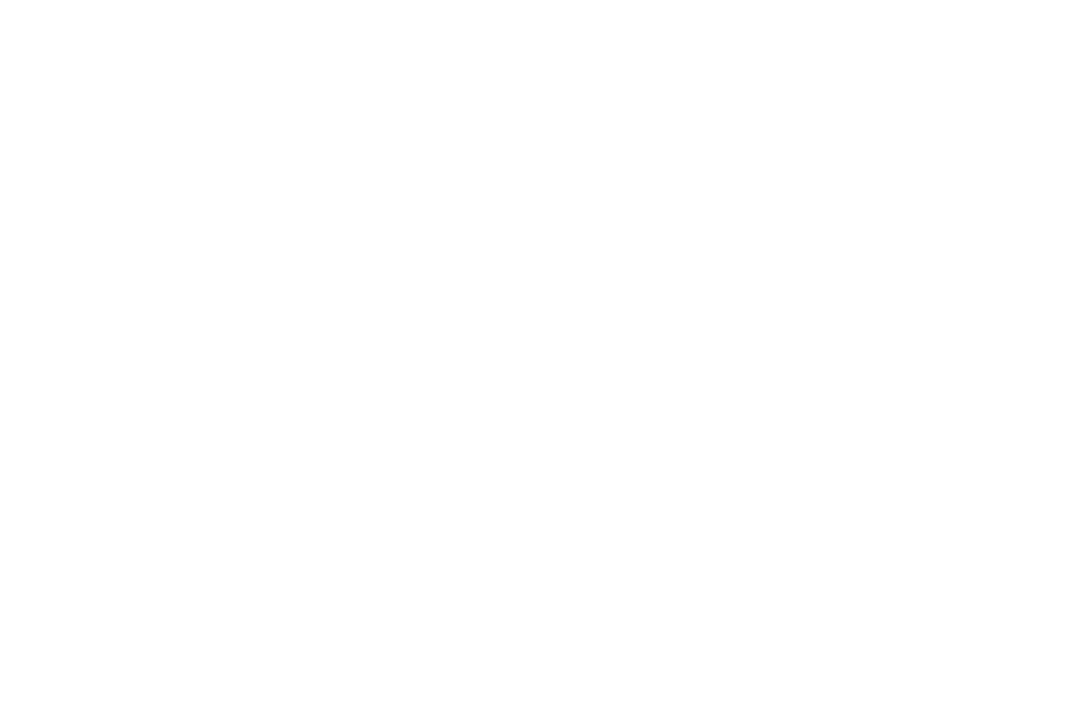

:Image   [x,y]   (z)

In [50]:
hv_dict['all_ptv_surfaces_by_PC_territory']

In [42]:
%matplotlib qt
surf

In [46]:
surf.
# plt.show()

<IPython.core.display.Javascript object>


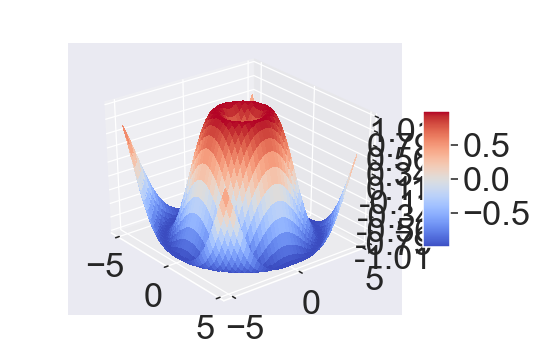

In [45]:
%matplotlib qt
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [23]:
# party_colour_dict.update( {x:k for x,k in zip(dominant_parties,big_set_of_colours[0:len(dominant_parties)+1]) if x not in party_colour_dict.keys()} )

# {x:k for x,k in zip(dominant_parties,big_set_of_colours[0:len(dominant_parties)+1]) if x not in party_colour_dict.keys()}

In [24]:
# 640 40 20: 1min 22s
# 640 X X: 1min 11s
# X 40 20: 1min 23s
# X 40 20: with output_granularity set at 40: 29s

In [25]:
BES_Panel[search( BES_Panel, stub_var+"("+"|".join( wave_list )+")").index]["2019GE"]

id
1        UNK
2        CON
3        BXP
4        UNK
5        UNK
        ... 
98447    UNK
98448    UNK
98449    DNV
98450    UNK
98451    UNK
Name: 2019GE, Length: 94493, dtype: category
Categories (12, object): [BXP, CON, DK, DNV, ..., PC, SNP, TYTV, UNK]

In [26]:
# CONTROLS:
# Party - pull down menus (select it and you can use keyboard arrows too - better for comparison!)
#    Parties reduced to shorthand labels (LAB/CON)
#    DK = Don't Know, DNV = Did Not Vote
#    MAX = maximum value for any choice (e.g. what you'd see if all the surfaces were present and you looked down from above and could only see the tops)
# Wave - slider (click on the slider and you can use keyboard arrows too)

# Not every party appears in every wave (because they didn't exist at that point/existed but didn't meet the minimum 100 sample size)
# This widget is really designed for situations where you have complete coverage of all variable combinations
# but I didn't want to throw stuff out - just understand that the chart won't update until you hit a valid wave for a party


In [27]:
def clean_key(x,rem_str):
    x = x.replace(rem_str,"").replace("all_ptv_surfaces","MAX")
    return ( x.split("W")[0] , int( x.split("W")[1] ) )

In [28]:
def clean_key_int_only(x,rem_str):
    x = x.replace(rem_str,"").replace("all_ptv_surfaces","MAX")
    return ( (all_wave_party_list+[ 'MAX' ]).index(x.split("W")[0]) , int( x.split("W")[1] ) )

In [29]:
# all_wave_party_list
parties = hv.Dimension(('party','political party'),
                       values=all_wave_party_list+[ 'MAX' ])
waves = hv.Dimension(('wave','BES sample wave'), range=(1,max_wave))

In [30]:
hv.output(backend='matplotlib',fig='svg', holomap='widgets', dpi=80, )
hv.HoloMap({clean_key_int_only(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
           kdims=["option chosen", waves],)
# 69 MB???? - > 30MB!

IndexError: list index out of range

In [ ]:
hv_dict

In [ ]:
# {clean_key_int_only(x,"_by_PC_interpolated"):hv_dict[x] for x in hv_dict.keys() if "interpolated" in x}[(0, 1)]

In [ ]:
hv.output(backend='matplotlib',fig='png', holomap='widgets', dpi=80, )
hv.HoloMap({clean_key_int_only(x,"_by_PC_interpolated"):hv_dict[x] for x in hv_dict.keys() if "interpolated" in x},
           kdims=["option chosen", waves])
# 13MB when exported!

In [ ]:
hv.output(backend='matplotlib',fig='png', holomap='widgets', dpi=80, )
hv.HoloMap({clean_key(x,"_by_PC_interpolated")[1]:hv_dict[x] for x in hv_dict.keys() if "territory" in x},
           kdims=[waves])
# this is 1MB when exported

In [ ]:
# hv.save(hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves]), 'out3.html', backend='plotly', dpi=50, holomap='widgets')

In [ ]:
# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}
# matplotlib.use('agg')   # generate svg output by default
# hv.output(backend='matplotlib',fig='svg', holomap='widgets')

# hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves])

In [ ]:
# matplotlib.use("nbAgg")

In [ ]:
# ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg',
#  'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [ ]:
# fmt = "png"

# # hv.extension('matplotlib')

# # if fmt!="png":
# #     matplotlib.use(fmt)
# # else:
# #     matplotlib.use('agg')
# # hv.extension.display_formats = [fmt]

# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}

# hv.output(backend='matplotlib',fig=fmt, holomap='widgets', dpi=80, size=80)

# hv.save(hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves]), fmt+str(output_granularity)+"x"+str(output_granularity)+'_3D.html')

# hv.save(hv.HoloMap({clean_key(x,"_by_PC_interpolated"):hv_dict[x] for x in hv_dict.keys() if "interpolated" in x},
#            kdims=[parties, waves]), fmt+str(output_granularity)+"x"+str(output_granularity)+'_interpolated.html')

# hv.save(hv.HoloMap({clean_key(x,"_by_PC_interpolated")[1]:hv_dict[x] for x in hv_dict.keys() if "territory" in x},
#            kdims=[waves]), fmt+str(output_granularity)+"x"+str(output_granularity)+'_territory.html')

In [ ]:
# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}
# matplotlib.use('agg')   # generate svg output by default
# hv.output(backend='matplotlib',fig='png', holomap='widgets', dpi=80)

# hv.save(hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves]), 'out7.html')

In [ ]:
# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}
# matplotlib.use('agg')   # generate svg output by default
# hv.output(backend='matplotlib',fig='png', holomap='widgets')

# hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves])

# hv.save(hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves]), 'out.html', backend='matplotlib',fmt='png', holomap='widgets', dpi=100)

In [ ]:
# hv.save(hv.HoloMap({clean_key(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
#            kdims=[parties, waves]), 'out.html', backend='matplotlib',fmt='pdf', holomap='widgets', dpi=100)

In [ ]:
# hv.help(hv.save)

In [ ]:
# hv.output(info=False)

In [ ]:
# help(hv.output)

In [ ]:
# # How about use the matplotlib holoview backend?
# hv.extension('matplotlib')
# # http://holoviews.org/user_guide/Plotting_with_Matplotlib.html




# # multiline titles also a hassle in bokeh/holoviews!

# #clabel='blahgfgfgfg')
# # hv.HeatMap(zip(X,Y,Z))

# # clabel='longblah',
# # colorbar vertical label kind of a hassle in bokeh!
# #  https://github.com/bokeh/bokeh/issues/7093
# # ,  colorbar_opts={'title':'alternablah','title_text_baseline':'ideographic'} -> maybe just use ticks?

In [ ]:
### build animated gif


filename_list = []
sorted_wavelist = []
skip_waves = [1,2,3,4,5,6,9,10,11,13,14,15,16 ]
wave_list = ["W"+str(x) for x in list(range(1,max_wave)) if x not in skip_waves]

for wave in wave_list:
    
    wave_no = int(wave.replace("W",""))
    sorted_wavelist.append(wave_no)
#     treatment = "ptv_surface"+wave+"_" + region + "_LEAVE2016"
    treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    treatment = stub_var+"_surface"+wave
    if region is not None:
        treatment = treatment+"_"+region
#     treatment = "eurefvote_surface"+wave+"originalPC"
#     C:\Users\Marios\Documents\GitHub\BES_analysis\BES_analysis_output\leftRight_minusDKs_surfaceW16
    filename_list.append( BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png" )



import imageio


images = []
for filename in filename_list:
    images.append(imageio.imread(filename))
images.append(imageio.imread(filename)) # last slide delay doesn't seem to be being respected on twitter - so add the last one twice
sorted_wavelist.append(wave_no)
imageio.mimsave(BES_output_folder + treatment + os.sep +'animated_ptv_surfaces.gif', images,'GIF',
                duration=[6.0 if x==np.min( sorted_wavelist ) or x==np.max( sorted_wavelist ) else 3.0 for x in sorted_wavelist])  

In [ ]:
# BES_output_folder + treatment + os.sep +'animated_ptv_surfaces.gif'

In [ ]:
# hv.Image(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max())).options(\
#                                                                       title=title_base+": "+"MAX"+title_extra+overall_N_equal_text,
#                                                                       xlabel=x_axis_label,
#                                                                       ylabel=y_axis_label,
# #                                                                       invert_yaxis=True,
#                                                                       colorbar=True,
#                                                                       clabel=scale_text,
#                                                                       fig_inches=(12,8),
#                                                                       fontsize={'title':20,'labels':18,'ticks':14}, )

In [ ]:
# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}
# matplotlib.use('pdf')   # generate svg output by default
# hv.output(backend='matplotlib',fig='svg', holomap='gif')


# # plt.figure(figsize=(14,14));
# # img = plt.imshow(Z,interpolation = 'none',origin ='lower',
# #           extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
# # plt.grid(None)
# # plt.locator_params(nbins=5)
# # cbar = plt.colorbar(img,shrink=0.5, aspect=5, label = scale_text);
# # plt.xlabel(x_axis_label);
# # plt.ylabel(y_axis_label);
# # plt.title(title_base+": "+"MAX"+title_extra+overall_N_equal_text)
# ## holoview add!
# hv.Image(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max())).options(\
#                                                                   title=title_base+": "+"MAX"+title_extra+overall_N_equal_text,
#                                                                   xlabel=x_axis_label,
#                                                                   ylabel=y_axis_label,
# #                                                                       invert_yaxis=True,
#                                                                   colorbar=True,
#                                                                   clabel=scale_text,
#                                                                   fig_inches=(12,8),
#                                                                   fontsize={'title':20,'labels':18,'ticks':14},
#                                                                   fig_rcparams={'backend' : 'pdf','savefig.format':'pdf'})

# # plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_interpolated" + ".jpeg",
# #             bbox_inches='tight')
# # plt.show()

In [ ]:
# hv.save(hv.Image(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max())).options(\
#                                                                   title=title_base+": "+"MAX"+title_extra+overall_N_equal_text,
#                                                                   xlabel=x_axis_label,
#                                                                   ylabel=y_axis_label,
# #                                                                       invert_yaxis=True,
#                                                                   colorbar=True,
#                                                                   clabel=scale_text,
#                                                                   fig_inches=(12,8),
#                                                                   fontsize={'title':20,'labels':18,'ticks':14},
#                                                                   fig_rcparams={'backend' : 'pdf','savefig.format':'pdf'}), 'download.pdf')

In [ ]:
# plt.gcf().canvas.get_supported_filetypes()

In [ ]:
# %config InlineBackend.print_figure_kwargs = {'pil_kwargs':{'optimize':True,'quality':5}}
# matplotlib.use('pgf')   # generate svg output by default
# %matplotlib inline

# img

In [ ]:
# help(hv.output)